In [2]:
import pandas as pd

csv_file_path = "C:\Python\Dossier csv\RSA BIKE protocole BDL - data (1).csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

print(df)

     Athlete Name  Session  Série  Sprint   Score
0         Terglav        1      1       1  1097.0
1        Mattioni        1      1       1   909.0
2            Kahn        1      1       1  1008.0
3         Kolonin        1      1       1   942.0
4          Quaix         1      1       1  1168.0
...           ...      ...    ...     ...     ...
1547      Kolonin        8      3      10   798.0
1548       Quaix         8      3      10  1022.0
1549         Nemo        8      3      10   724.0
1550      Raveaud        8      3      10   810.0
1551      Nicoud         8      3      10   854.0

[1552 rows x 5 columns]


In [3]:
print(df.to_string())

     Athlete Name  Session  Série  Sprint   Score
0         Terglav        1      1       1  1097.0
1        Mattioni        1      1       1   909.0
2            Kahn        1      1       1  1008.0
3         Kolonin        1      1       1   942.0
4          Quaix         1      1       1  1168.0
5            Nemo        1      1       1   731.0
6         Raveaud        1      1       1   848.0
7         Nicoud         1      1       1   960.0
8         Terglav        1      2       1   990.0
9        Mattioni        1      2       1   860.0
10           Kahn        1      2       1   991.0
11        Kolonin        1      2       1   852.0
12         Quaix         1      2       1  1112.0
13           Nemo        1      2       1   738.0
14        Raveaud        1      2       1   892.0
15        Nicoud         1      2       1   823.0
16        Terglav        1      1       2  1090.0
17       Mattioni        1      1       2   956.0
18           Kahn        1      1       2   936.0


In [4]:
descriptive_stats = df.describe()

print("Statistiques descriptives du dataframe :")
print(descriptive_stats)

Statistiques descriptives du dataframe :
           Session        Série       Sprint        Score
count  1552.000000  1552.000000  1552.000000  1468.000000
mean      4.865979     1.855670     5.170103   815.352861
std       2.228142     0.773376     2.736092    96.978937
min       1.000000     1.000000     1.000000   545.000000
25%       3.000000     1.000000     3.000000   746.750000
50%       5.000000     2.000000     5.000000   805.000000
75%       7.000000     2.000000     7.000000   880.000000
max       8.000000     3.000000    10.000000  1168.000000


In [5]:
session_1_data = df[df['Session'] == 1]

# Grouper les données par sprint et afficher les scores correspondants
sprint_scores = session_1_data.groupby('Série')['Score'].apply(list)

print("Scores de chaque sprint de la session 1 :")
print(sprint_scores)

Scores de chaque sprint de la session 1 :
Série
1    [1097.0, 909.0, 1008.0, 942.0, 1168.0, 731.0, ...
2    [990.0, 860.0, 991.0, 852.0, 1112.0, 738.0, 89...
Name: Score, dtype: object


In [6]:
print(sprint_scores.to_string())

Série
1    [1097.0, 909.0, 1008.0, 942.0, 1168.0, 731.0, ...
2    [990.0, 860.0, 991.0, 852.0, 1112.0, 738.0, 89...


Résumé des scores de chaque sprint de la session 1 :
Série
1    864.453125
2    817.312500
Name: Score, dtype: float64


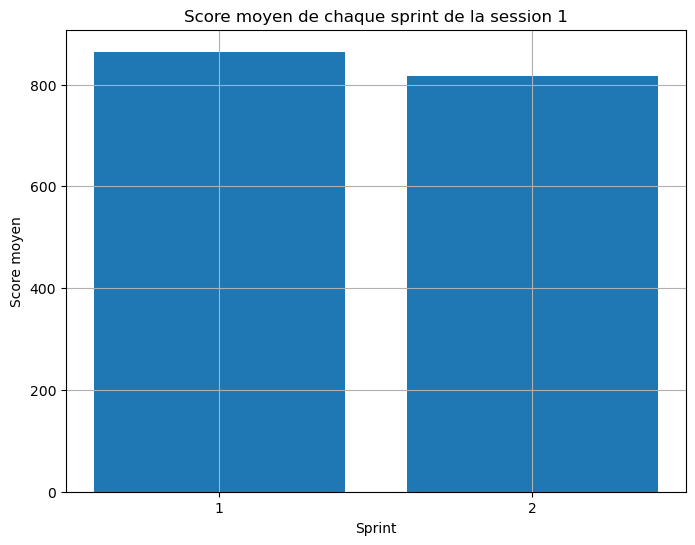

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



session_1_data = df[df['Session'] == 1]

# Grouper les données par sprint et calculer la moyenne des scores de chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Afficher les scores de chaque sprint dans un tableau
print("Résumé des scores de chaque sprint de la session 1 :")
print(sprint_scores_mean)

# Créer un graphique
plt.figure(figsize=(8, 6))
plt.bar(sprint_scores_mean.index, sprint_scores_mean.values)
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Score moyen de chaque sprint de la session 1')
plt.xticks(sprint_scores_mean.index)
plt.grid(True)
plt.show()

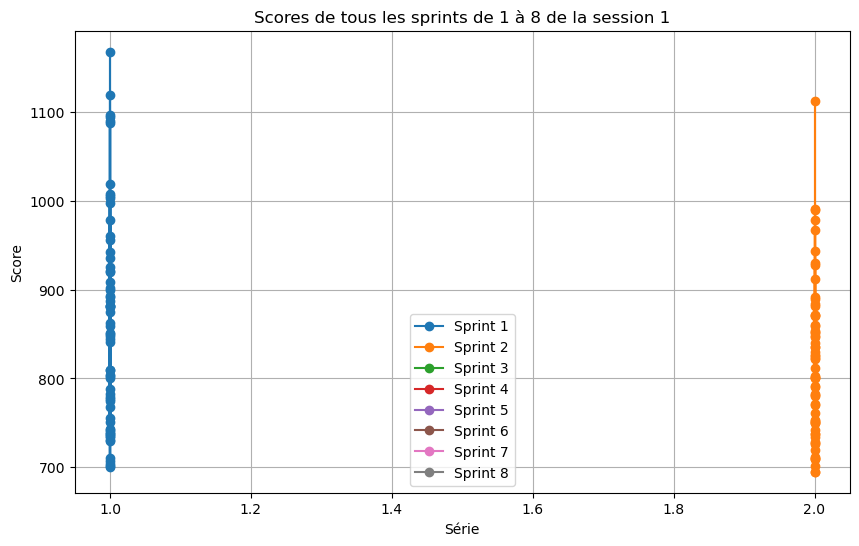

In [9]:
session_1_sprints = df[(df['Session'] == 1) & (df['Série'] <= 8)]

# Créer un graphique
plt.figure(figsize=(10, 6))
for sprint in range(1, 9):
    sprint_data = session_1_sprints[session_1_sprints['Série'] == sprint]
    plt.plot(sprint_data['Série'], sprint_data['Score'], marker='o', label=f'Sprint {sprint}')

plt.xlabel('Série')
plt.ylabel('Score')
plt.title('Scores de tous les sprints de 1 à 8 de la session 1')
plt.legend()
plt.grid(True)
plt.show()

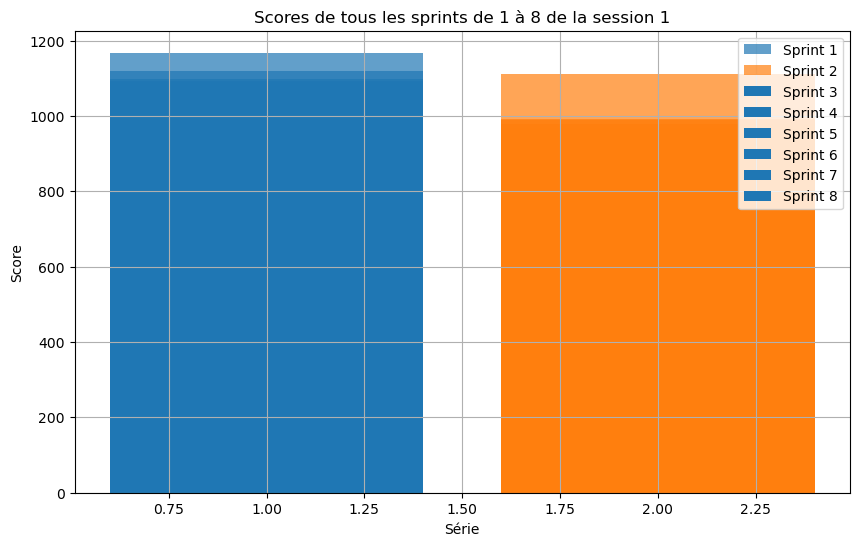

In [10]:
session_1_sprints = df[(df['Session'] == 1) & (df['Série'] <= 8)]

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
for sprint in range(1, 9):
    sprint_data = session_1_sprints[session_1_sprints['Série'] == sprint]
    plt.bar(sprint_data['Série'], sprint_data['Score'], label=f'Sprint {sprint}', alpha=0.7)

plt.xlabel('Série')
plt.ylabel('Score')
plt.title('Scores de tous les sprints de 1 à 8 de la session 1')
plt.legend()
plt.grid(True)
plt.show()

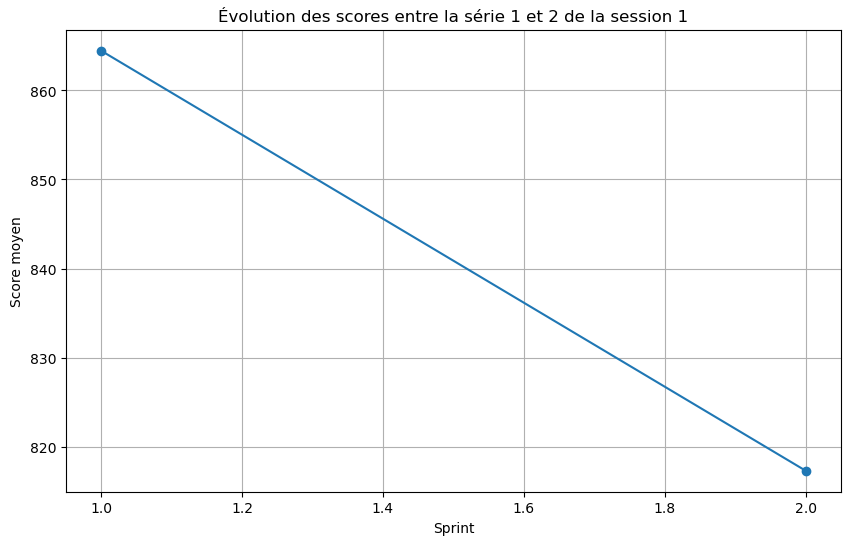

In [90]:
session_1_data = df[df['Session'] == 1]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:8]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 2 de la session 1')
plt.grid(True)
plt.show()

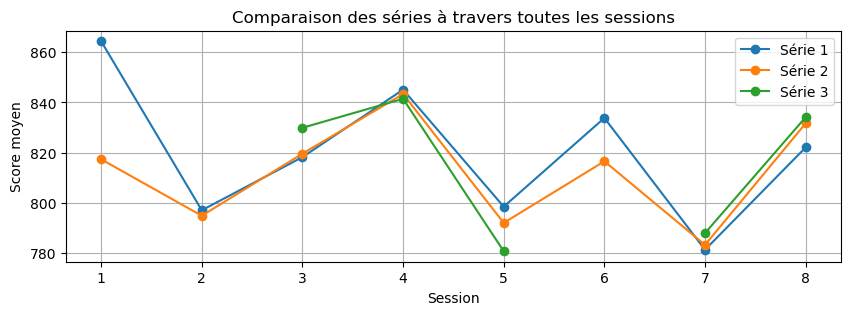

In [18]:
# Calculer la moyenne des scores pour chaque série dans chaque session
session_serie_means = df.groupby(['Session', 'Série'])['Score'].mean().unstack()

# Créer un graphique
plt.figure(figsize=(10, 3))
for serie in session_serie_means.columns:
    plt.plot(session_serie_means.index, session_serie_means[serie], marker='o', label=f'Série {serie}')

plt.xlabel('Session')
plt.ylabel('Score moyen')
plt.title('Comparaison des séries à travers toutes les sessions')
plt.legend()
plt.grid(True)
plt.show()

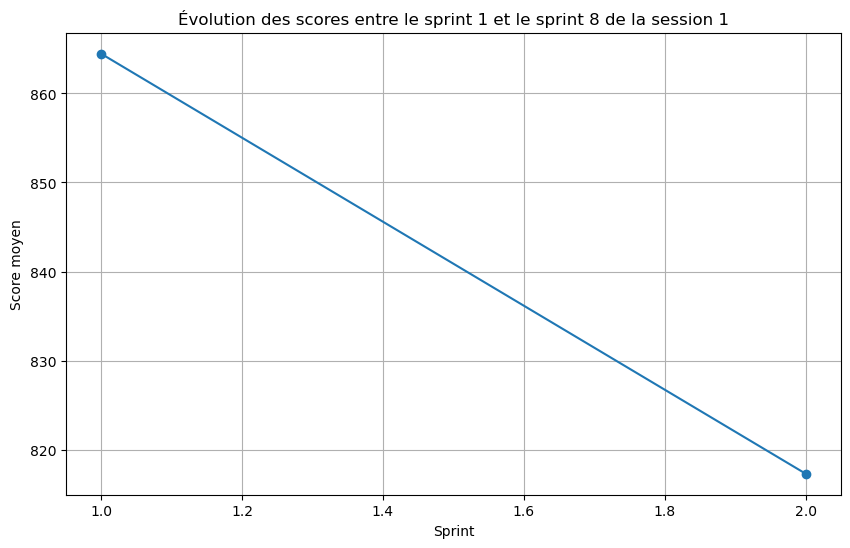

In [35]:
session_1_data = df[df['Session'] == 1]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:8]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre le sprint 1 et le sprint 8 de la session 1')
plt.grid(True)
plt.show()

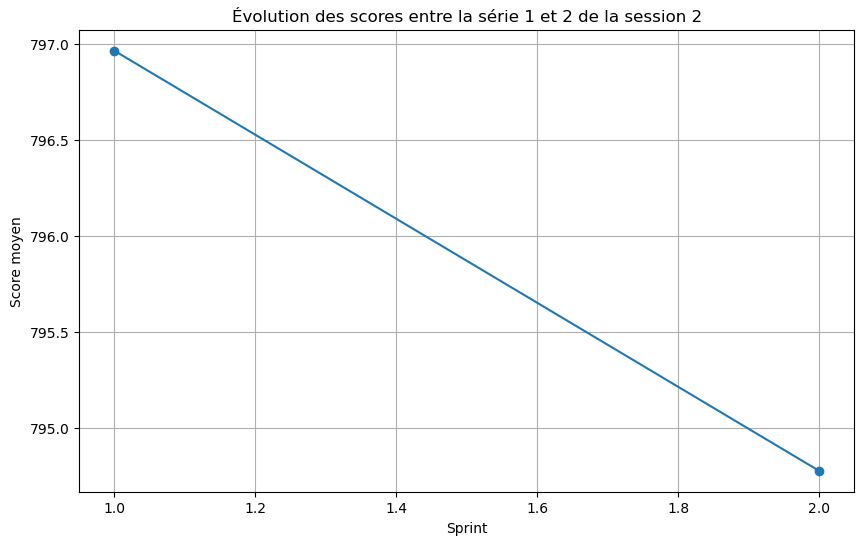

In [91]:
session_1_data = df[df['Session'] == 2]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:10]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 2 de la session 2')
plt.grid(True)
plt.show()

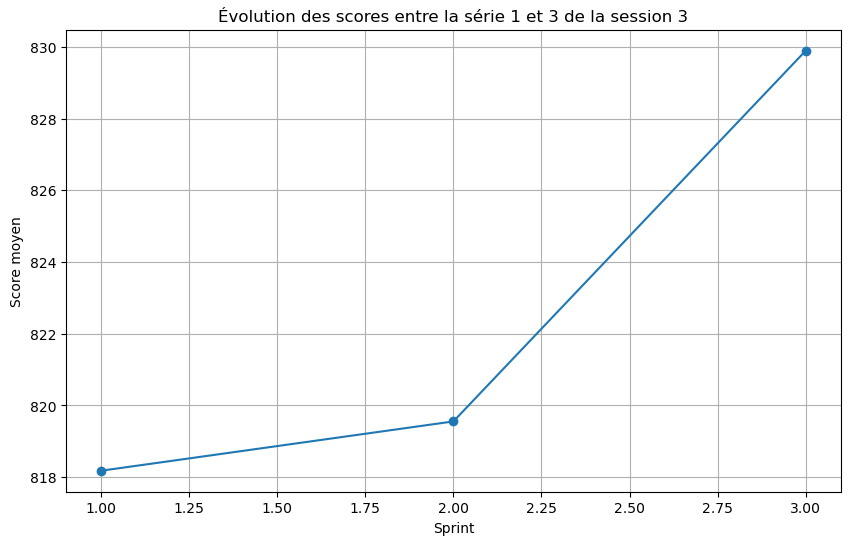

In [92]:
session_1_data = df[df['Session'] == 3]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:10]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 3 de la session 3')
plt.grid(True)
plt.show()

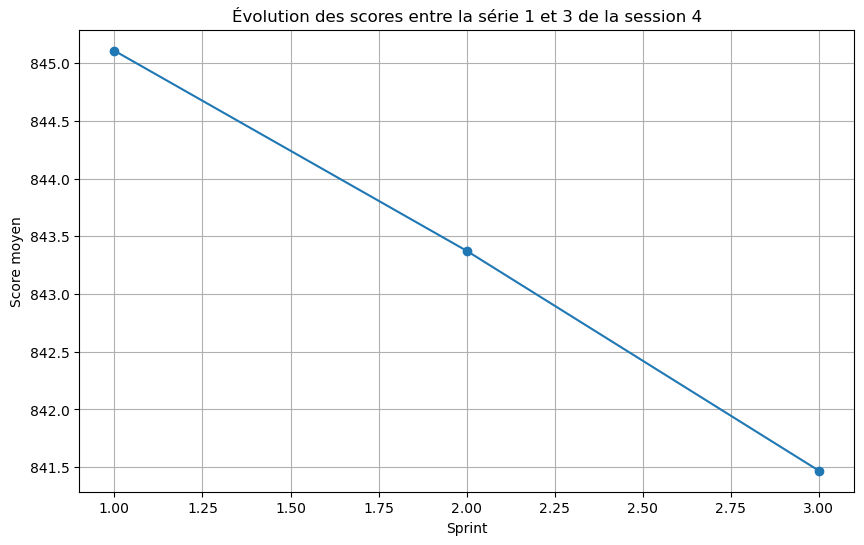

In [93]:
session_1_data = df[df['Session'] == 4]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:8]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 3 de la session 4')
plt.grid(True)
plt.show()

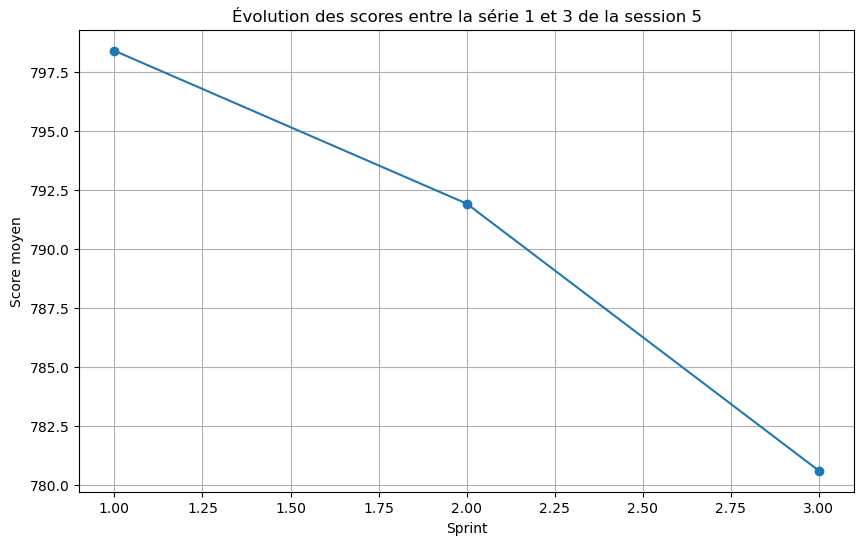

In [94]:
session_1_data = df[df['Session'] == 5]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:10]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 3 de la session 5')
plt.grid(True)
plt.show()

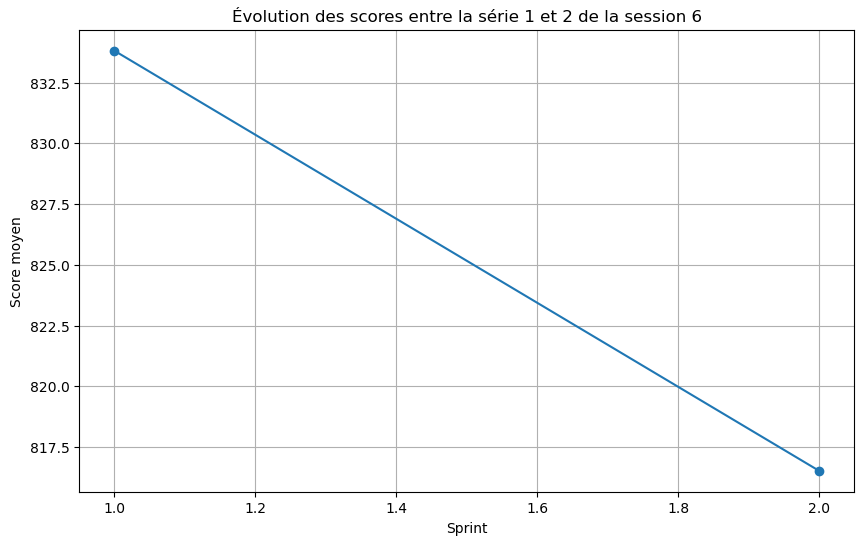

In [99]:
session_1_data = df[df['Session'] == 6]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:10]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 2 de la session 6')
plt.grid(True)
plt.show()

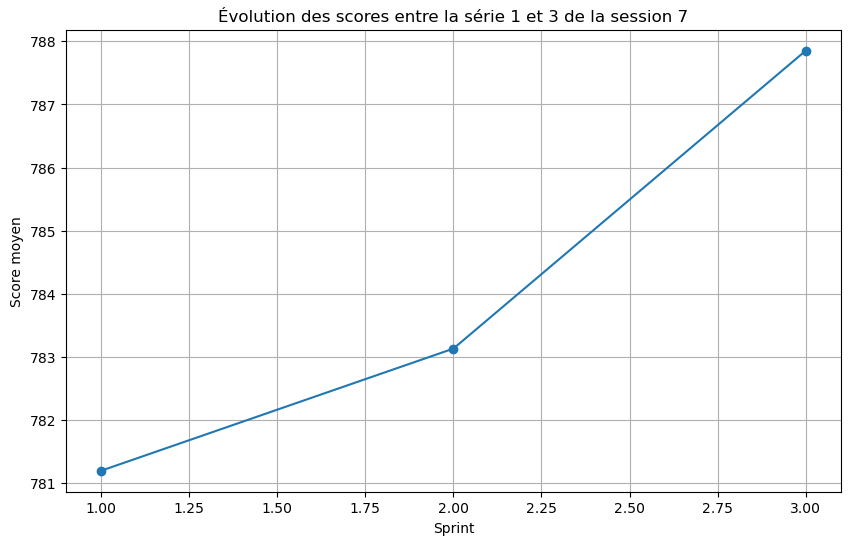

In [95]:
session_1_data = df[df['Session'] == 7]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:10]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 3 de la session 7')
plt.grid(True)
plt.show()

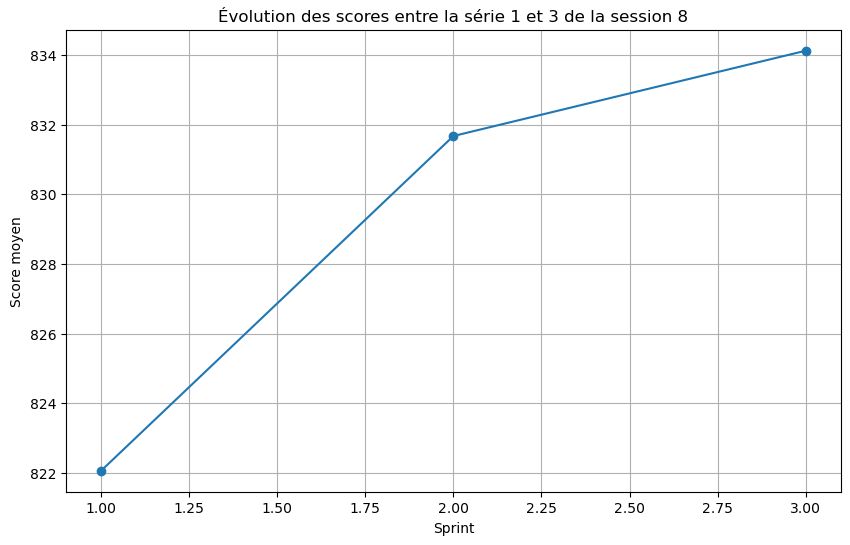

In [98]:
session_1_data = df[df['Session'] == 8]

# Calculer la moyenne des scores pour chaque sprint
sprint_scores_mean = session_1_data.groupby('Série')['Score'].mean()

# Sélectionner uniquement les sprints de 1 à 8
sprint_scores_mean = sprint_scores_mean.loc[1:10]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_scores_mean.index, sprint_scores_mean.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores entre la série 1 et 3 de la session 8')
plt.grid(True)
plt.show()

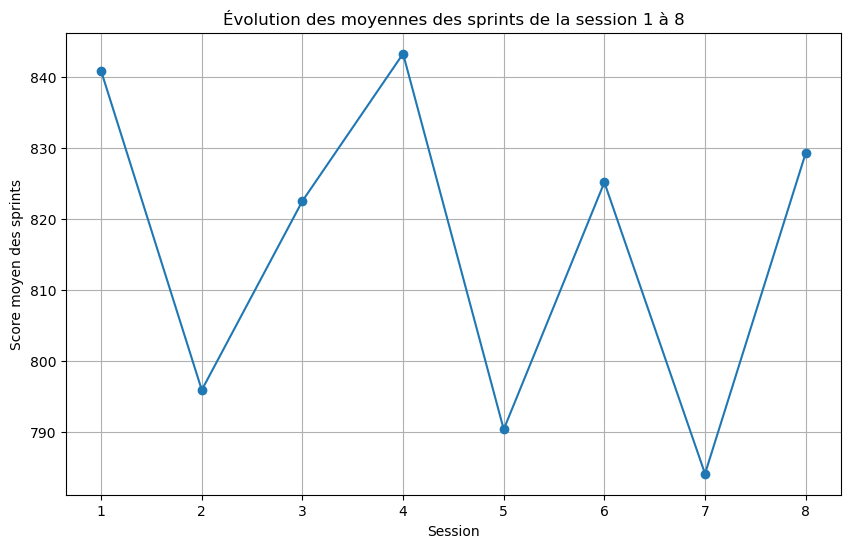

In [100]:
sessions_1_to_8 = df[df['Session'].between(1, 10)]

# Calculer la moyenne des scores pour chaque sprint dans chaque session
session_sprint_means = sessions_1_to_8.groupby(['Session', 'Série'])['Score'].mean().unstack()

# Calculer la moyenne des moyennes des sprints pour chaque session
session_means = session_sprint_means.mean(axis=1)

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(session_means.index, session_means.values, marker='o')
plt.xlabel('Session')
plt.ylabel('Score moyen des sprints')
plt.title('Évolution des moyennes des sprints de la session 1 à 8')
plt.grid(True)
plt.show()

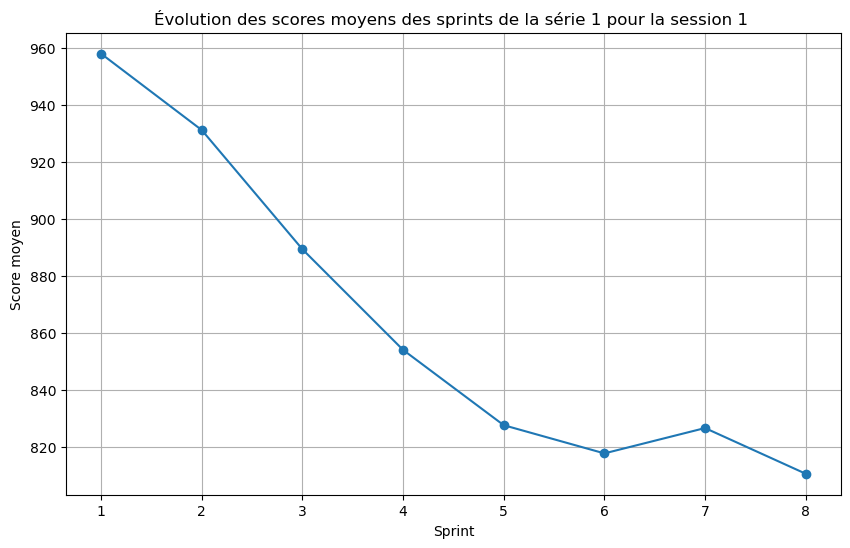

In [60]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([1]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la session 1 ')
plt.grid(True)
plt.show()



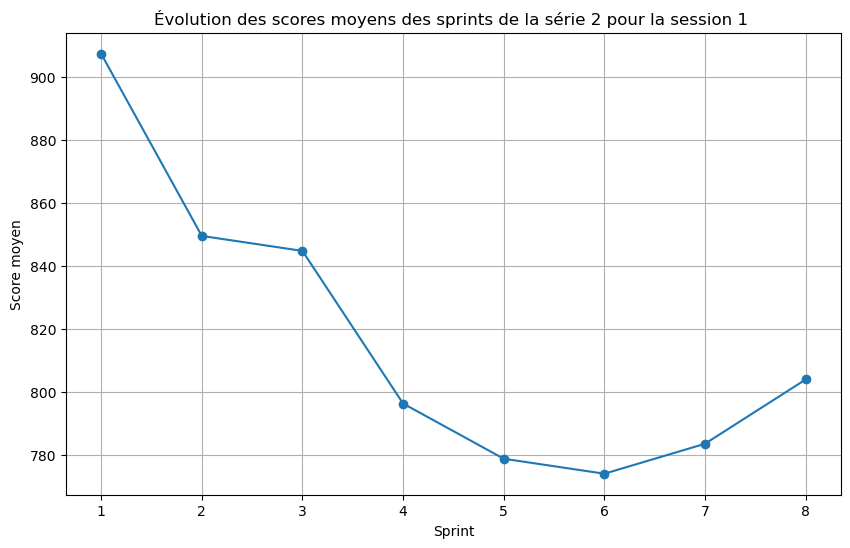

In [61]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([1]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la session 1 ')
plt.grid(True)
plt.show()


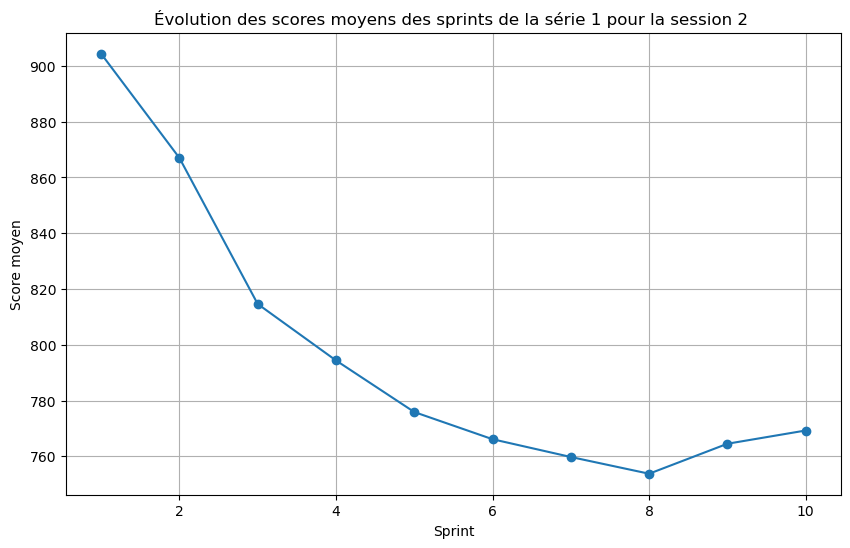

In [62]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([2]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la session 2 ')
plt.grid(True)
plt.show()


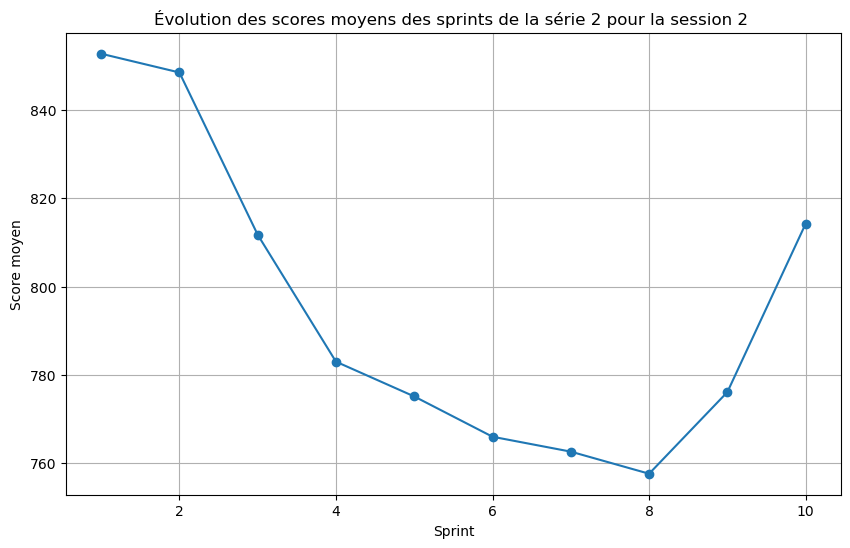

In [63]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([2]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la session 2 ')
plt.grid(True)
plt.show()


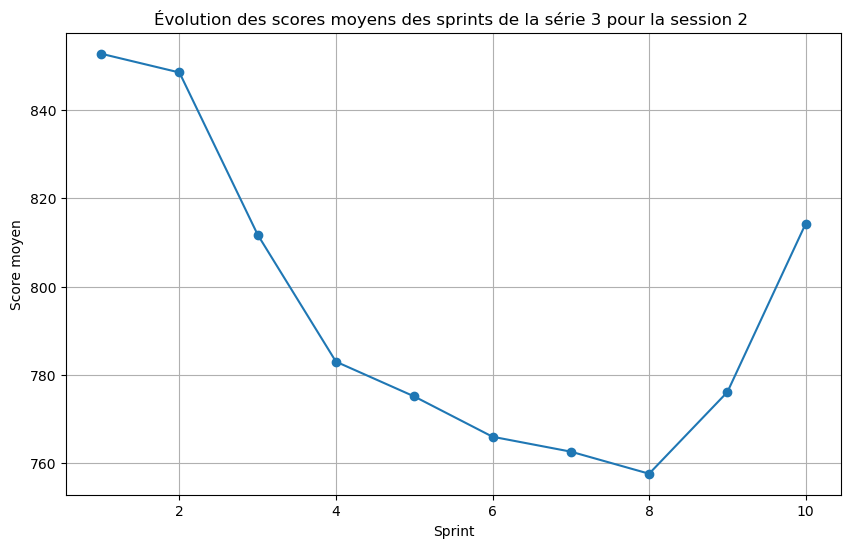

In [64]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([2]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 3 pour la session 2 ')
plt.grid(True)
plt.show()


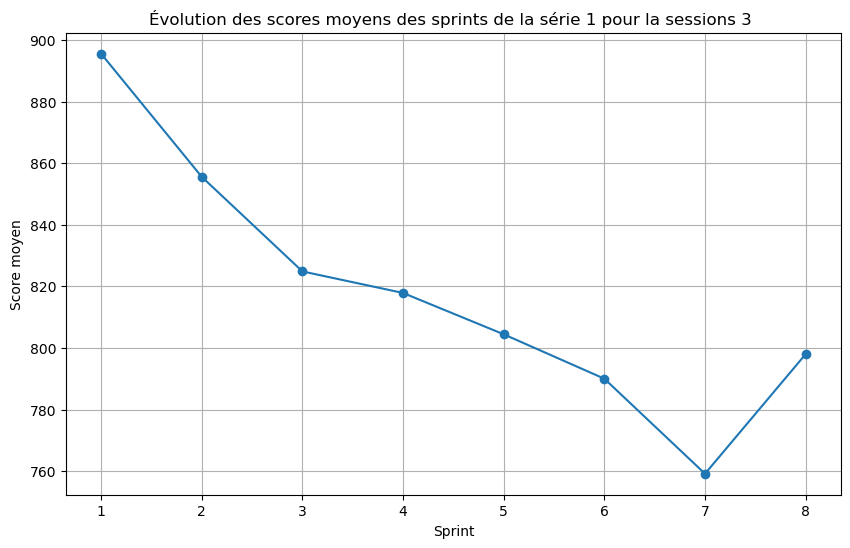

In [65]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([3]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la sessions 3 ')
plt.grid(True)
plt.show()


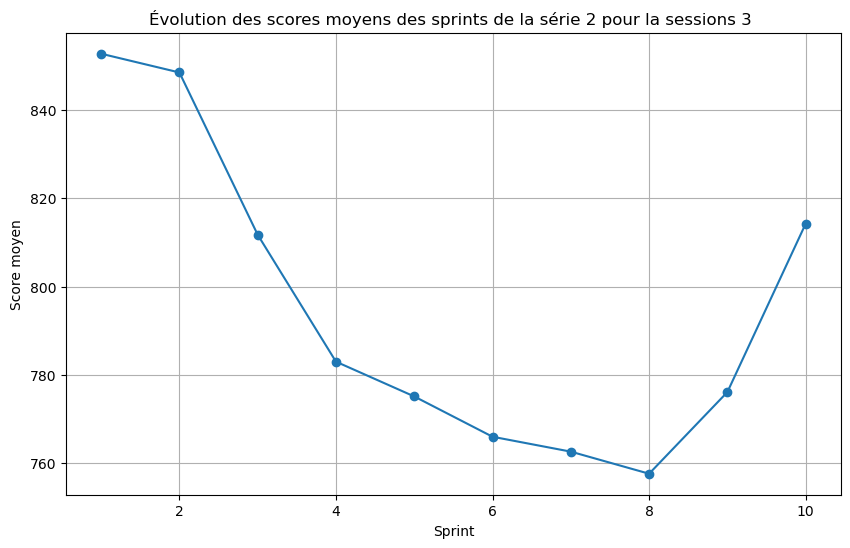

In [66]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([2]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la sessions 3 ')
plt.grid(True)
plt.show()


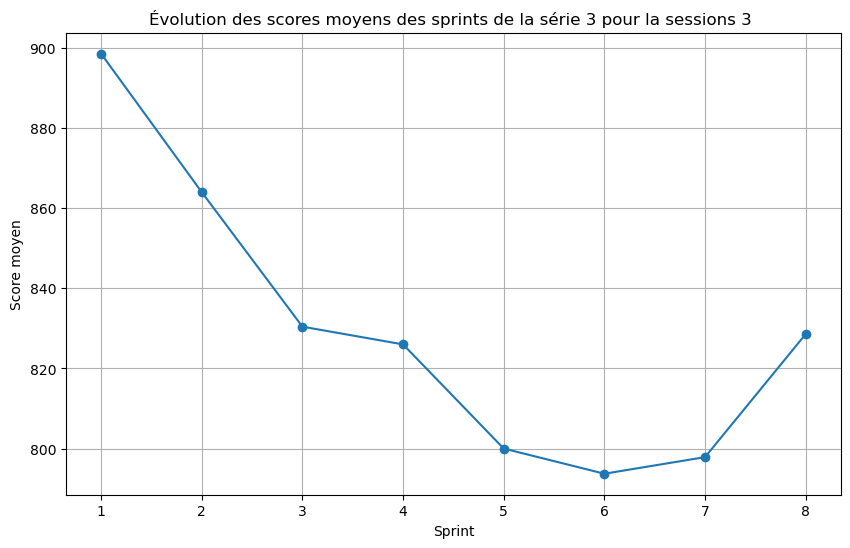

In [68]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([3])) & (df['Session'].isin([3]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 3 pour la sessions 3 ')
plt.grid(True)
plt.show()


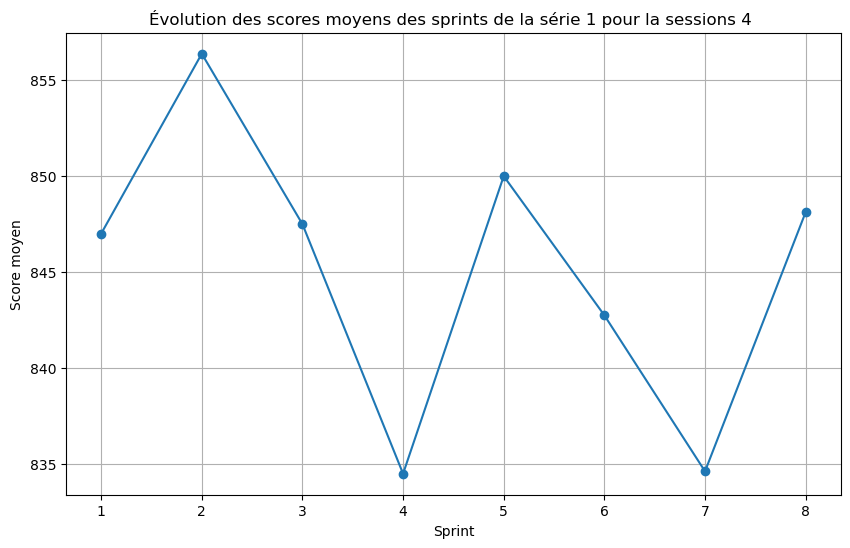

In [70]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([4]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la sessions 4 ')
plt.grid(True)
plt.show()

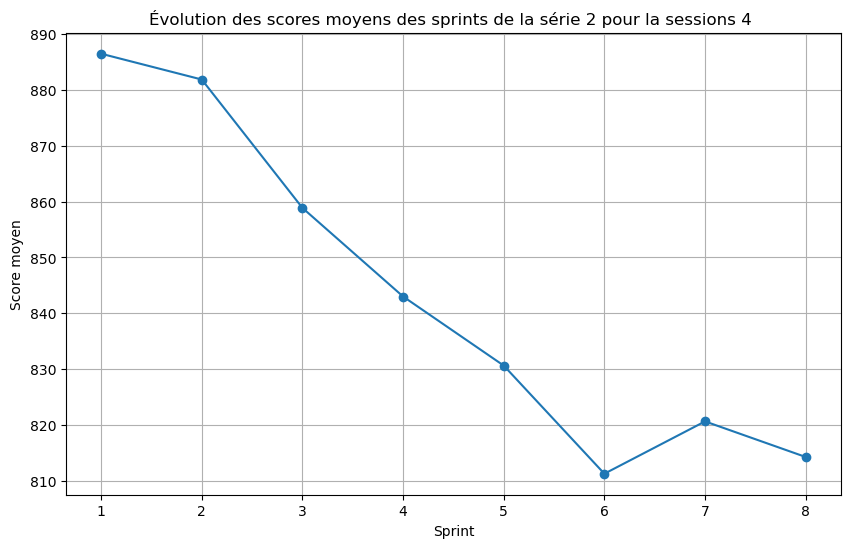

In [71]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([4]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la sessions 4 ')
plt.grid(True)
plt.show()

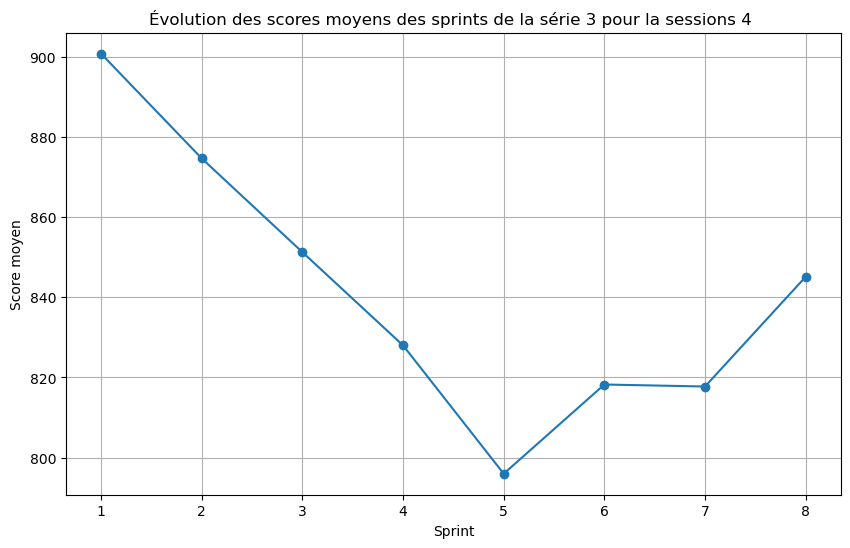

In [72]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([3])) & (df['Session'].isin([4]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 3 pour la sessions 4 ')
plt.grid(True)
plt.show()

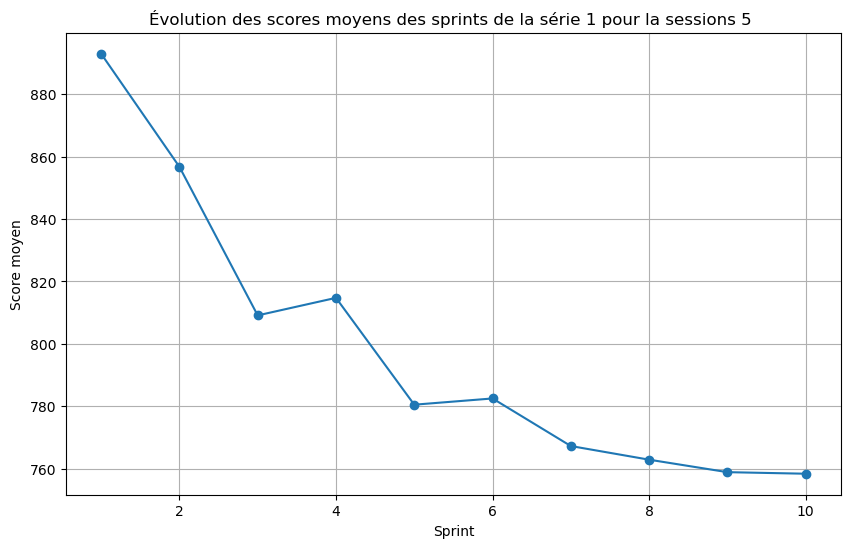

In [73]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([5]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la sessions 5 ')
plt.grid(True)
plt.show()

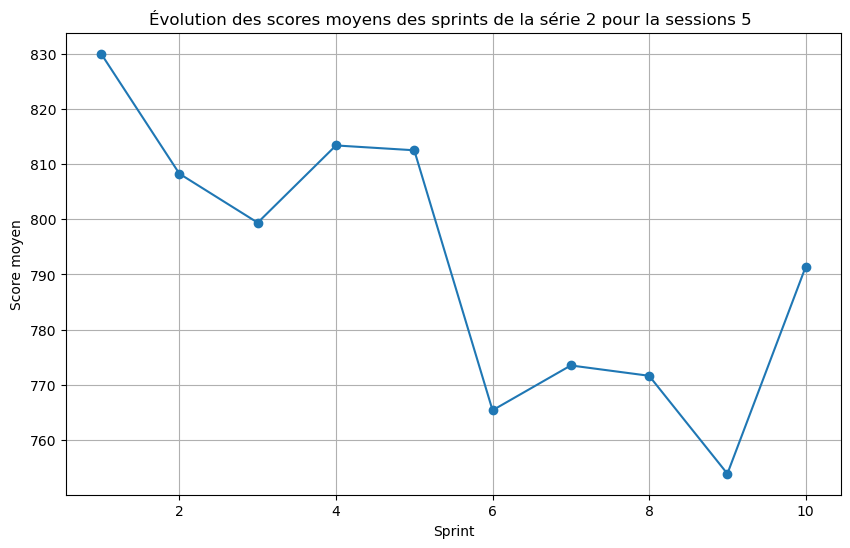

In [74]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([5]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la sessions 5 ')
plt.grid(True)
plt.show()

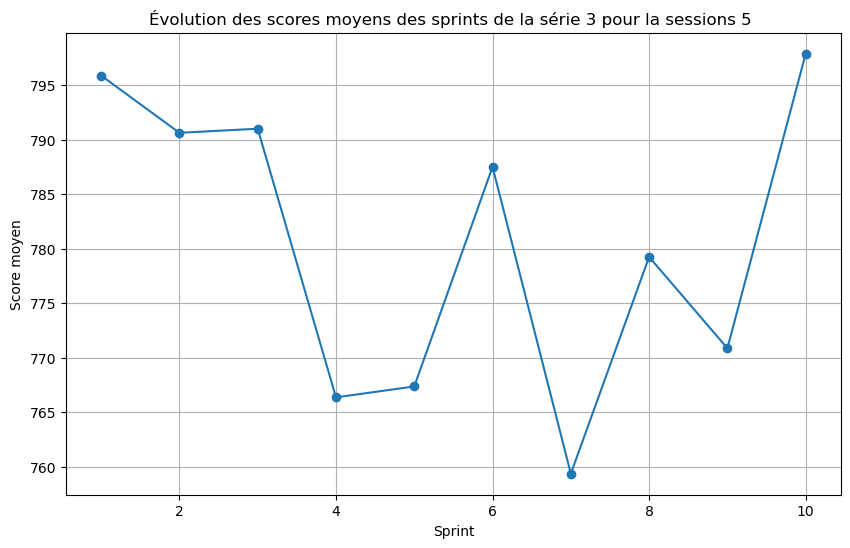

In [75]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([3])) & (df['Session'].isin([5]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 3 pour la sessions 5 ')
plt.grid(True)
plt.show()

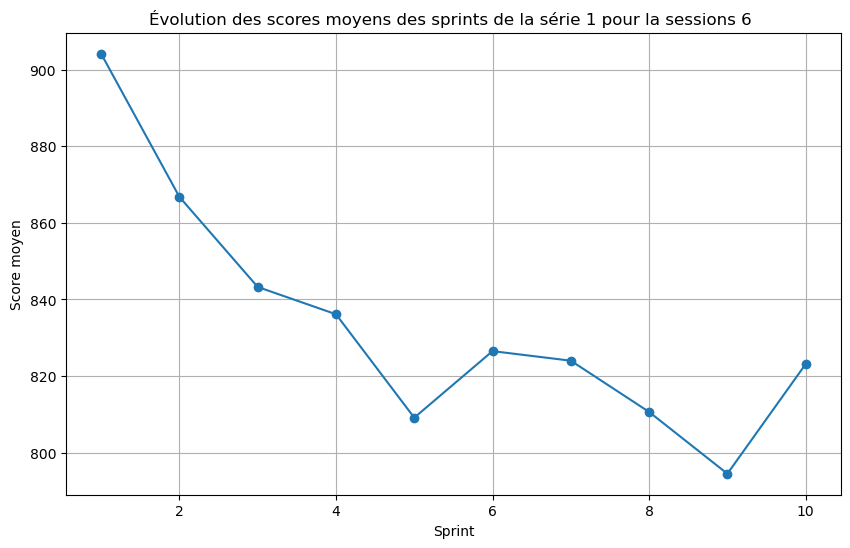

In [76]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([6]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la sessions 6 ')
plt.grid(True)
plt.show()

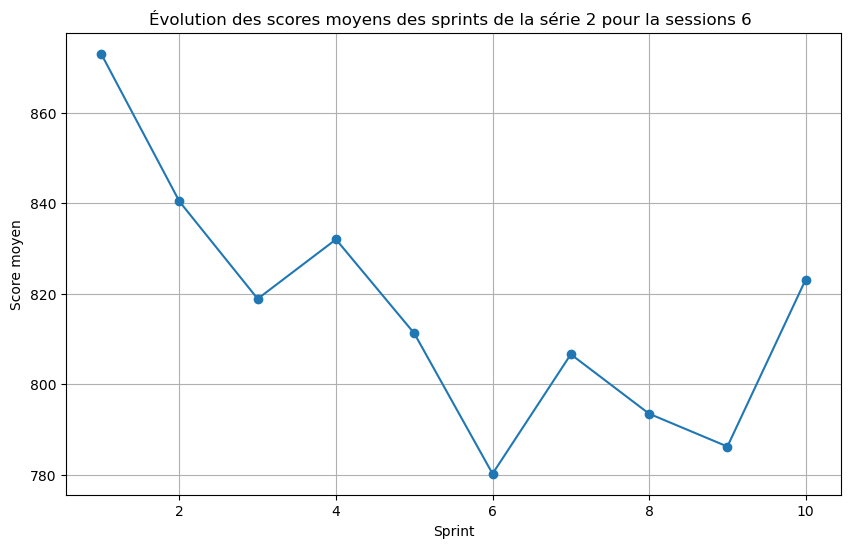

In [77]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([6]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la sessions 6 ')
plt.grid(True)
plt.show()

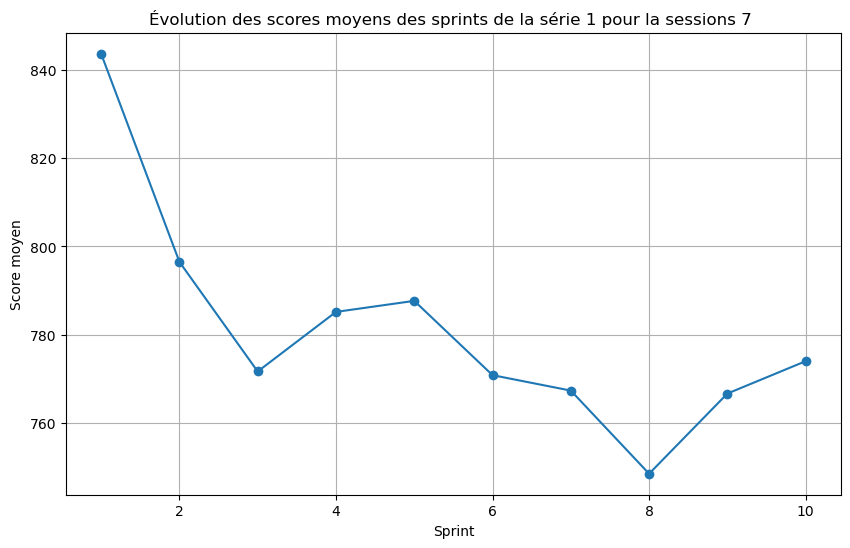

In [79]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([7]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la sessions 7 ')
plt.grid(True)
plt.show()

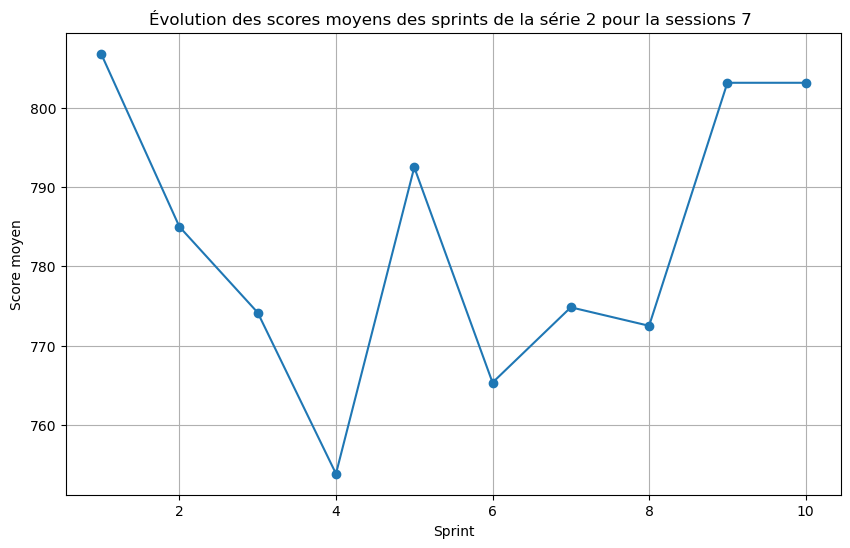

In [80]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([7]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la sessions 7 ')
plt.grid(True)
plt.show()

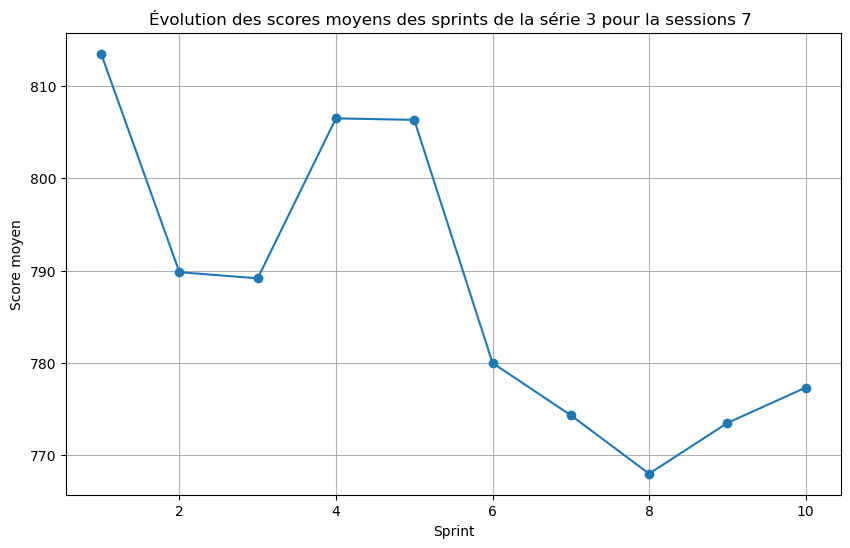

In [81]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([3])) & (df['Session'].isin([7]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 3 pour la sessions 7 ')
plt.grid(True)
plt.show()

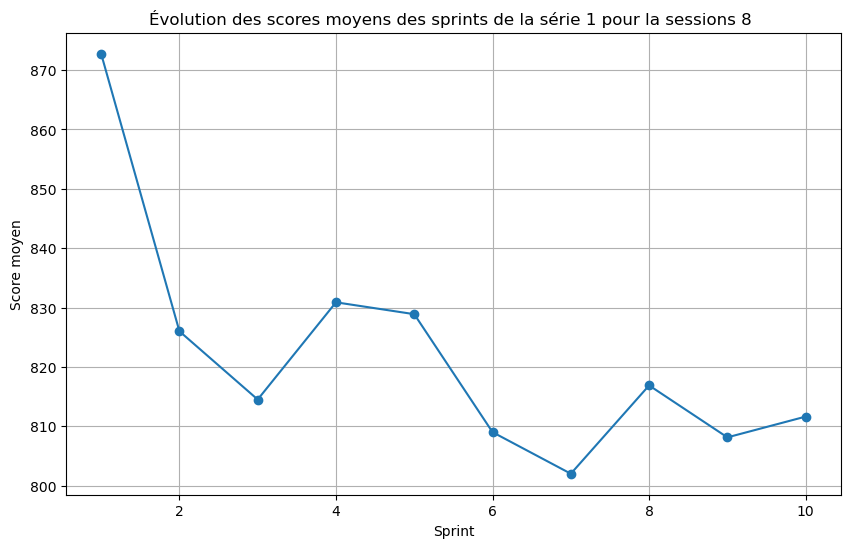

In [82]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1])) & (df['Session'].isin([8]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 1 pour la sessions 8 ')
plt.grid(True)
plt.show()

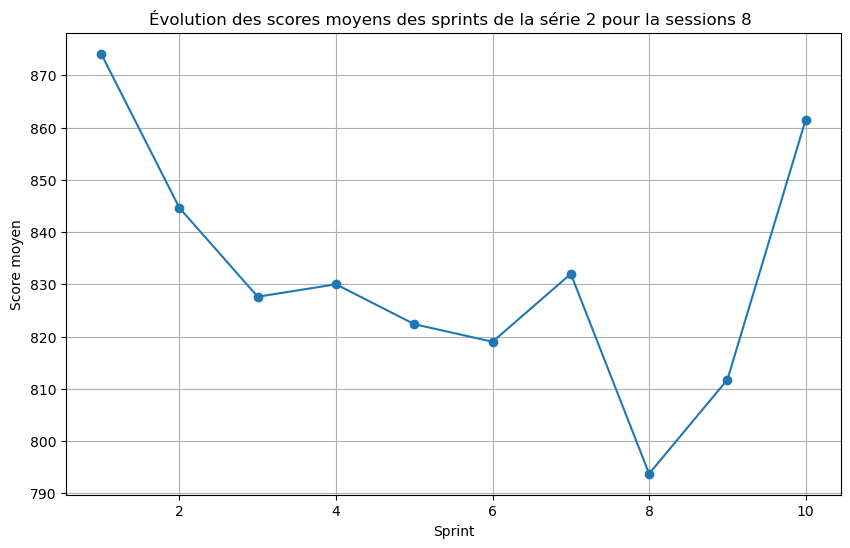

In [84]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([2])) & (df['Session'].isin([8]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 2 pour la sessions 8 ')
plt.grid(True)
plt.show()

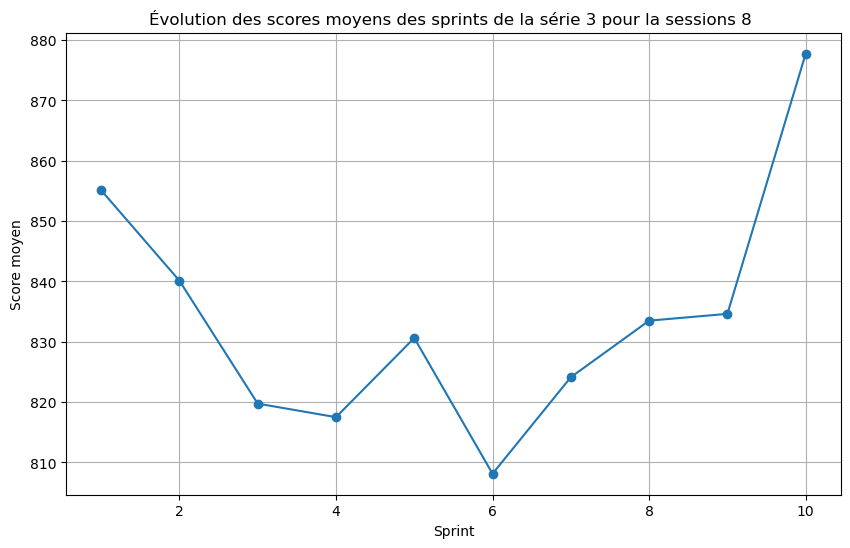

In [107]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([3])) & (df['Session'].isin([8]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de la série 3 pour la sessions 8 ')
plt.grid(True)
plt.show()

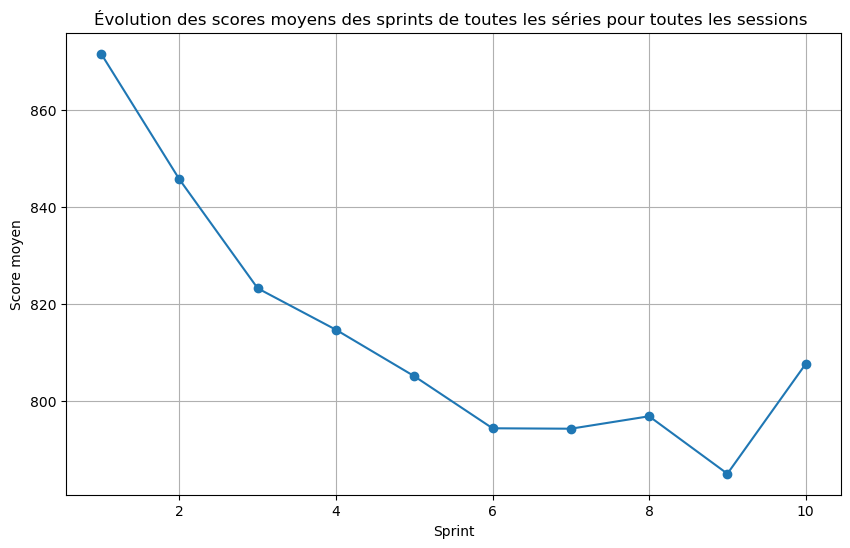

In [86]:
# Filtrer les données pour la série 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1,2,3])) & (df['Session'].isin([1,2,3,4,5,6,7,8]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de toutes les séries pour toutes les sessions ')
plt.grid(True)
plt.show()

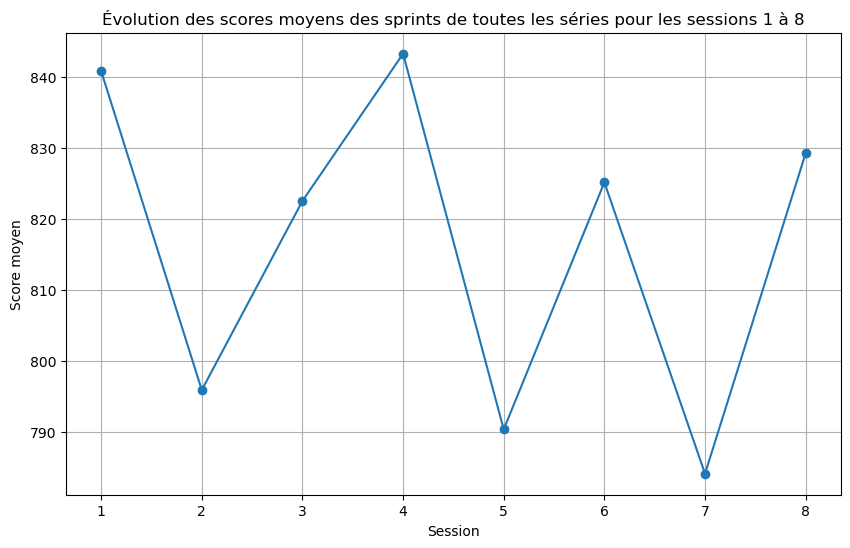

In [89]:
# Filtrer les données pour les séries 1, 2 et 3 et les sessions de 1 à 8
series_1_to_3_session_1_to_8 = df[(df['Série'].isin([1, 2, 3])) & (df['Session'].isin([1, 2, 3, 4, 5, 6, 7, 8]))]

# Calculer la moyenne des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_8.groupby('Session')['Score'].mean()

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
plt.xlabel('Session')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints de toutes les séries pour les sessions 1 à 8')
plt.grid(True)
plt.show()


In [102]:
# Grouper les données par session et sprint, puis calculer les statistiques descriptives pour chaque groupe
stats_descriptives = df.groupby(['Session', 'Série'])['Score'].describe()

# Afficher le tableau de statistiques descriptives
print(stats_descriptives)



               count        mean         std    min     25%    50%     75%  \
Session Série                                                                
1       1       64.0  864.453125  118.791658  700.0  765.00  855.0  928.50   
        2       64.0  817.312500   86.226147  695.0  750.00  807.5  862.50   
2       1       80.0  796.962500   90.486231  634.0  728.75  780.0  830.50   
        2       80.0  794.775000   80.322763  652.0  739.25  794.0  830.25   
3       1       56.0  818.178571   86.008267  682.0  741.50  810.5  898.50   
        2       56.0  819.553571   81.822184  703.0  756.75  802.0  872.75   
        3       56.0  829.892857   83.447246  693.0  762.50  811.0  902.75   
4       1       64.0  845.109375   94.386258  665.0  794.25  818.0  946.50   
        2       64.0  843.375000   88.273115  671.0  780.00  822.5  917.75   
        3       64.0  841.468750   91.454728  703.0  773.50  825.5  905.25   
5       1       80.0  798.400000  102.249212  594.0  740.50  811

In [106]:
# Grouper les données par session et sprint, puis calculer les statistiques descriptives pour chaque groupe
stats_descriptives = df.groupby(['Session', 'Série'])['Score'].describe()

# Appliquer le style avec une alternance de gris et de blanc
styled_table = stats_descriptives.style.set_properties(**{'background-color': 'white',
                                                         'color': 'black',
                                                         'border-color': 'black'})

# Appliquer une couleur de fond différente pour les lignes impaires
styled_table = styled_table.apply(lambda x: ['background-color: #f2f2f2' if i % 2 == 0 else '' for i, _ in enumerate(x)], axis=1)

# Ajouter un titre au tableau avec une police plus grande
styled_table.set_caption('<h2 style="font-size: 20px">Tableau des statistiques descriptives par session et sprint</h2>')

# Afficher le tableau de statistiques descriptives stylisé avec un titre
styled_table

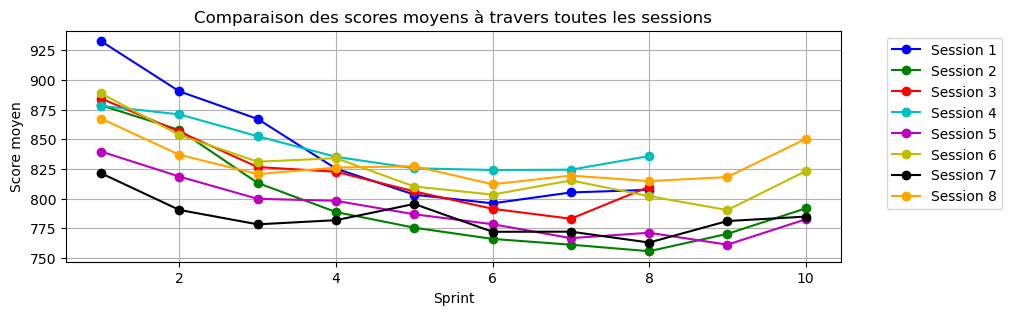

In [118]:
# Importer la librairie matplotlib.pyplot
import matplotlib.pyplot as plt

# Liste des couleurs pour chaque session
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Créer un graphique
plt.figure(figsize=(10, 3))
for i, session in enumerate(sprint_session_means.columns):
    plt.plot(sprint_session_means.index, sprint_session_means[session], marker='o', color=colors[i], label=f'Session {session}')

plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Comparaison des scores moyens à travers toutes les sessions')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


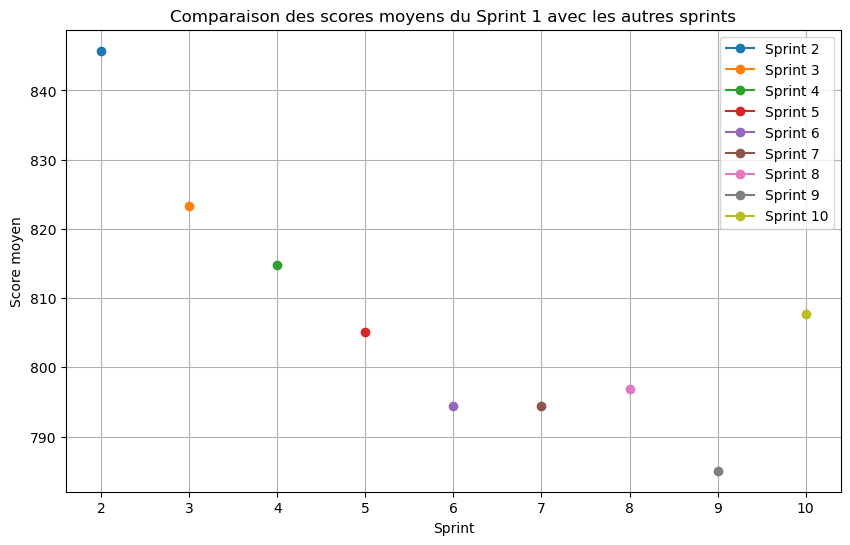

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



sprint_means = df.groupby('Sprint')['Score'].mean()

# Test de Student entre le sprint 1 et les autres sprints
p_values = {}
for sprint, score_mean in sprint_means.items():
    if sprint != 1:
        _, p_value = stats.ttest_ind(df[df['Sprint'] == 1]['Score'], df[df['Sprint'] == sprint]['Score'])
        p_values[sprint] = p_value

# Niveau de signification
alpha = 0.05

# Créer un graphique
plt.figure(figsize=(10, 6))
significant_sprints = []
for sprint, score_mean in sprint_means.items():
    if sprint != 1:
        plt.plot(sprint, score_mean, marker='o', label=f'Sprint {sprint}')
        if p_values[sprint] < alpha:
            significant_sprints.append(sprint)

# Marquer les sprints significativement différents
for sprint in significant_sprints:
    plt.text(sprint, sprint_means[sprint] + 0.5, '*', fontsize=50, horizontalalignment='center')

plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Comparaison des scores moyens du Sprint 1 avec les autres sprints')
plt.grid(True)
plt.legend()
plt.show()

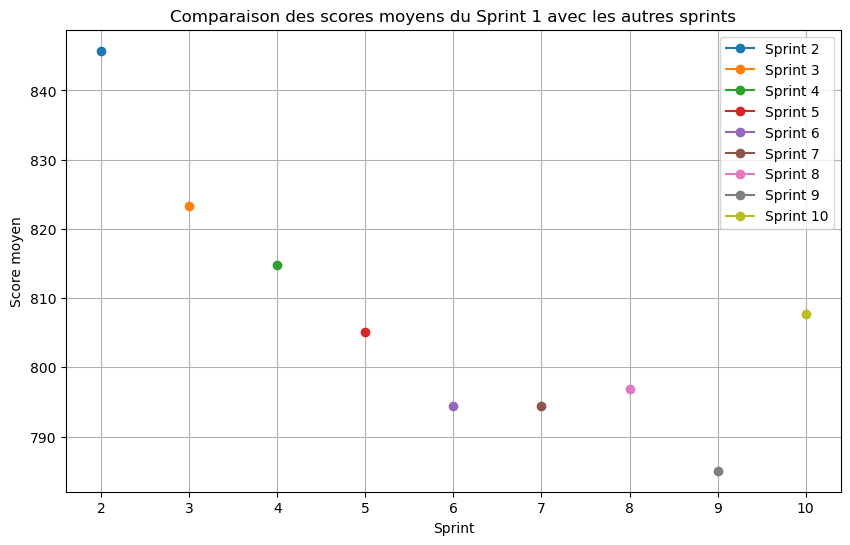

In [124]:
sprint1_mean = df[df['Sprint'] == 1]['Score'].mean()

# Calculer les scores moyens pour tous les sprints
sprint_means = df.groupby('Sprint')['Score'].mean()

# Test de Student entre le sprint 1 et les autres sprints
p_values = {}
for sprint, score_mean in sprint_means.items():
    if sprint != 1:
        _, p_value = stats.ttest_ind(df[df['Sprint'] == 1]['Score'], df[df['Sprint'] == sprint]['Score'])
        p_values[sprint] = p_value

# Niveau de signification
alpha = 0.05

# Créer un graphique
plt.figure(figsize=(10, 6))
significant_sprints = []
for sprint, score_mean in sprint_means.items():
    if sprint != 1:
        plt.plot(sprint, score_mean, marker='o', linestyle='-', label=f'Sprint {sprint}')
        if p_values[sprint] < alpha:
            significant_sprints.append(sprint)

# Marquer les sprints significativement différents
for sprint in significant_sprints:
    plt.text(sprint, sprint_means[sprint] + 0.5, '*', fontsize=12, horizontalalignment='center')

plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Comparaison des scores moyens du Sprint 1 avec les autres sprints')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
import pandas as pd

csv_file_path = "C:\Python\Dossier csv\RSA BIKE protocole BDL - data (1).csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

sprint_means = df.groupby('Sprint')['Score'].mean()

# Créer un DataFrame pour stocker les différences significatives
significant_differences = pd.DataFrame(columns=['Sprint', 'Différence', 'p-valeur'])

# Test de Student entre le sprint 1 et les autres sprints
for sprint, score_mean in sprint_means.items():
    if sprint != 1:
        _, p_value = stats.ttest_ind(df[df['Sprint'] == 1]['Score'], df[df['Sprint'] == sprint]['Score'])
        if p_value < 0.05:  # Test de signification
            diff = score_mean - sprint_means[1]
            significant_differences = significant_differences.append({'Sprint': sprint, 'Différence': diff, 'p-valeur': p_value}, ignore_index=True)

print("Différences significatives :")
print(significant_differences)

Différences significatives :
Empty DataFrame
Columns: [Sprint, Différence, p-valeur]
Index: []


In [19]:
import pandas as pd
from scipy import stats

# Supposons que df est votre DataFrame

# On sépare les données en deux groupes : sprint numéro 1 et les autres sprints
Sprint1_data = df[df['Sprint'] == 1]['Score']
other_sprints_data = df[df['Sprint'] != 1]['Score']

# On effectue le test t de Student
t_statistic, p_value = stats.ttest_ind(Sprint1_data, other_sprints_data)

# Afficher le résultat
if p_value < 0.05:
    # Si le p-value est inférieur à 0.05, on rejette l'hypothèse nulle
    print("Il existe une différence significative entre les moyennes des sprints numéro 1 et des autres sprints.")
else:
    print("Il n'existe pas de différence significative entre les moyennes des sprints numéro 1 et des autres sprints.")


Il n'existe pas de différence significative entre les moyennes des sprints numéro 1 et des autres sprints.


In [20]:
import pandas as pd
from scipy import stats

# Supposons que df est votre DataFrame

# On sépare les données en deux groupes : sprint numéro 1 et les autres sprints
Sprint1_data = df[df['Sprint'] == 1]['Score']
other_sprints_data = df[df['Sprint'] == 8]['Score']

# On effectue le test t de Student
t_statistic, p_value = stats.ttest_ind(Sprint1_data, other_sprints_data)

# Afficher le résultat
if p_value < 0.05:
    # Si le p-value est inférieur à 0.05, on rejette l'hypothèse nulle
    print("Il existe une différence significative entre les moyennes des sprints numéro 1 et des autres sprints.")
else:
    print("Il n'existe pas de différence significative entre les moyennes des sprints numéro 1 et des autres sprints.")


Il n'existe pas de différence significative entre les moyennes des sprints numéro 1 et des autres sprints.


In [25]:
import pandas as pd
from scipy import stats

# Supposons que df est votre DataFrame

# On sépare les données en deux groupes : sprint numéro 1 et les autres sprints pour la session 1
sprint1_session1_data = df[(df['Sprint'] == 1) & (df['Session'] == 1)]['Score']
other_sprints_session1_data = df[(df['Sprint'] == 5) & (df['Session'] == 1)]['Score']

# On effectue le test t de Student
t_statistic, p_value = stats.ttest_ind(sprint1_session1_data, other_sprints_session1_data)

# Afficher le résultat
if p_value < 0.05:
    # Si le p-value est inférieur à 0.05, on rejette l'hypothèse nulle
    print("Il existe une différence significative entre les moyennes de la session 1 du sprint numéro 1 et des autres sprints.")
else:
    print("Il n'existe pas de différence significative entre les moyennes de la session 1 du sprint numéro 1 et des autres sprints.")


Il existe une différence significative entre les moyennes de la session 1 du sprint numéro 1 et des autres sprints.


In [26]:
import pandas as pd

# Supposons que df est votre DataFrame

# Calculer les différences moyennes des scores entre le sprint 1 et les autres sprints pour chaque session
for session in range(1, 8):  # Boucle sur chaque session de 1 à 8
    sprint1_session_data = df[(df['Sprint'] == 1) & (df['Session'] == session)]['Score'].mean()
    other_sprints_session_data = df[(df['Sprint'] != 1) & (df['Session'] == session)]['Score'].mean()
    difference = sprint1_session_data - other_sprints_session_data
    print(f"Différence pour la session {session} : {difference}")


Différence pour la session 1 : 104.77678571428567
Différence pour la session 2 : 91.88194444444446
Différence pour la session 3 : 70.56462585034024
Différence pour la session 4 : 39.73214285714289
Différence pour la session 5 : 54.79166666666663
Différence pour la session 6 : 70.4375
Différence pour la session 7 : 41.413580246913625


In [35]:
import pandas as pd
from scipy import stats


# Supposons que df est votre DataFrame

# Définir le niveau de signification
alpha = 0.05

# Calculer les différences moyennes des scores entre le sprint 1 et les autres sprints pour chaque session
for session in range(1, 9):  # Boucle sur chaque session de 1 à 8
    sprint1_session_data = df[(df['Sprint'] == 1) & (df['Session'] == session)]['Score']
    other_sprints_session_data = df[(df['Sprint'] != 1) & (df['Session'] == session)]['Score']
    
    # Effectuer le test t de Student
    t_statistic, p_value = stats.ttest_ind(sprint1_session_data, other_sprints_session_data)


    # Afficher le résultat
    if p_value < alpha:
        print(f"Différence pour la session {session} : {sprint1_session_data.mean() - other_sprints_session_data.mean()} (Significatif)")
    else:
        print(f"Différence pour la session {session} : {sprint1_session_data.mean() - other_sprints_session_data.mean()} (Non significatif)")


Différence pour la session 1 : 104.77678571428567 (Significatif)
Différence pour la session 2 : 91.88194444444446 (Significatif)
Différence pour la session 3 : 70.56462585034024 (Non significatif)
Différence pour la session 4 : 39.73214285714289 (Significatif)
Différence pour la session 5 : 54.79166666666663 (Significatif)
Différence pour la session 6 : 70.4375 (Significatif)
Différence pour la session 7 : 41.413580246913625 (Non significatif)
Différence pour la session 8 : 42.27314814814815 (Non significatif)


In [31]:
import pandas as pd
from scipy import stats

# Supposons que df est votre DataFrame

# Définir le niveau de signification
alpha = 0.05

# Liste des numéros de sprint à comparer avec le sprint 1
sprint_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculer les différences moyennes des scores entre le sprint 1 et chaque autre sprint pour chaque session
for session in range(1, 9):  # Boucle sur chaque session de 1 à 8
    print(f"\nSession {session}:")
    for sprint_number in sprint_numbers:
        sprint1_session_data = df[(df['Sprint'] == 1) & (df['Session'] == session)]['Score']
        other_sprint_session_data = df[(df['Sprint'] == sprint_number) & (df['Session'] == session)]['Score']
        
        # Effectuer le test t de Student
        t_statistic, p_value = stats.ttest_ind(sprint1_session_data, other_sprint_session_data)
        
        # Afficher le résultat
        if p_value < alpha:
            print(f"Différence avec le sprint {sprint_number} : {sprint1_session_data.mean() - other_sprint_session_data.mean()} (Significatif)")
        else:
            print(f"Différence avec le sprint {sprint_number} : {sprint1_session_data.mean() - other_sprint_session_data.mean()} (Non significatif)")



Session 1:
Différence avec le sprint 2 : 42.25 (Non significatif)
Différence avec le sprint 3 : 65.5 (Non significatif)
Différence avec le sprint 4 : 107.3125 (Significatif)
Différence avec le sprint 5 : 129.25 (Significatif)
Différence avec le sprint 6 : 136.5625 (Significatif)
Différence avec le sprint 7 : 127.375 (Significatif)
Différence avec le sprint 8 : 125.1875 (Significatif)
Différence avec le sprint 9 : nan (Non significatif)
Différence avec le sprint 10 : nan (Non significatif)

Session 2:
Différence avec le sprint 2 : 20.8125 (Non significatif)
Différence avec le sprint 3 : 65.375 (Non significatif)
Différence avec le sprint 4 : 89.875 (Significatif)
Différence avec le sprint 5 : 103.0625 (Significatif)
Différence avec le sprint 6 : 112.5 (Significatif)
Différence avec le sprint 7 : 117.375 (Significatif)
Différence avec le sprint 8 : 122.875 (Significatif)
Différence avec le sprint 9 : 108.25 (Significatif)
Différence avec le sprint 10 : 86.8125 (Significatif)

Session 3:

Tableau résumant les différences moyennes entre le sprint 1 et les autres sprints pour chaque session :
   Session                               Sprint 2  \
0        1               42.25 (Non significatif)   
1        2             20.8125 (Non significatif)   
2        3  27.904761904761926 (Non significatif)   
3        4               7.125 (Non significatif)   
4        5   21.08333333333337 (Non significatif)   
5        6                35.0 (Non significatif)   
6        7  30.888888888888914 (Non significatif)   
7        8  30.416666666666742 (Non significatif)   

                                Sprint 3  \
0                65.5 (Non significatif)   
1              65.375 (Non significatif)   
2   57.71428571428578 (Non significatif)   
3  25.541666666666742 (Non significatif)   
4   39.79166666666663 (Non significatif)   
5                57.5 (Non significatif)   
6                43.0 (Non significatif)   
7   46.70833333333337 (Non significatif)   

                     

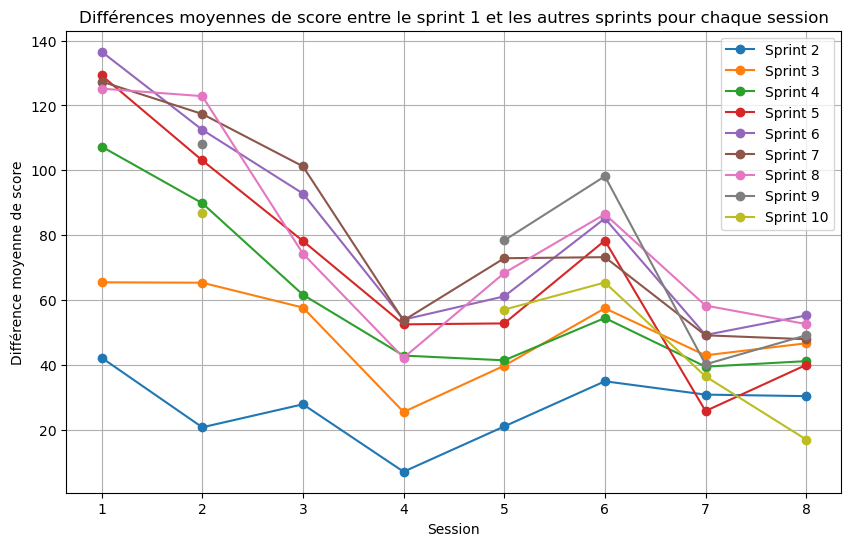

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df est votre DataFrame

# Définir le niveau de signification
alpha = 0.05

# Liste des numéros de sprint à comparer avec le sprint 1
sprint_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Créer une liste pour stocker les résultats
results = []

# Calculer les différences moyennes des scores entre le sprint 1 et chaque autre sprint pour chaque session
for session in range(1, 9):  # Boucle sur chaque session de 1 à 8
    session_results = {'Session': session}
    
    for sprint_number in sprint_numbers:
        sprint1_session_data = df[(df['Sprint'] == 1) & (df['Session'] == session)]['Score']
        other_sprint_session_data = df[(df['Sprint'] == sprint_number) & (df['Session'] == session)]['Score']
        
        # Effectuer le test t de Student
        t_statistic, p_value = stats.ttest_ind(sprint1_session_data, other_sprint_session_data)
        
        # Stocker les résultats
        if p_value < alpha:
            session_results[f'Sprint {sprint_number}'] = f"{sprint1_session_data.mean() - other_sprint_session_data.mean()} (Significatif)"
        else:
            session_results[f'Sprint {sprint_number}'] = f"{sprint1_session_data.mean() - other_sprint_session_data.mean()} (Non significatif)"
    
    results.append(session_results)

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Afficher le tableau résumant les résultats
print("Tableau résumant les différences moyennes entre le sprint 1 et les autres sprints pour chaque session :")
print(results_df)

# Tracer un graphique des différences moyennes entre le sprint 1 et les autres sprints pour chaque session
plt.figure(figsize=(10, 6))

for sprint_number in sprint_numbers:
    differences = results_df[f'Sprint {sprint_number}'].apply(lambda x: float(x.split()[0]))
    plt.plot(range(1, 9), differences, marker='o', label=f'Sprint {sprint_number}')

plt.xlabel('Session')
plt.ylabel('Différence moyenne de score')
plt.title('Différences moyennes de score entre le sprint 1 et les autres sprints pour chaque session')
plt.legend()
plt.grid(True)
plt.show()


,Session,Sprint 2,Sprint 3,Sprint 4,Sprint 5,Sprint 6,Sprint 7,Sprint 8,Sprint 9,Sprint 10
0,1,42.25 (Non significatif),65.5 (Non significatif),107.3125 (Significatif)*,129.25 (Significatif)*,136.5625 (Significatif)*,127.375 (Significatif)*,125.1875 (Significatif)*,nan (Non significatif),nan (Non significatif)
1,2,20.8125 (Non significatif),65.375 (Non significatif),89.875 (Significatif)*,103.0625 (Significatif)*,112.5 (Significatif)*,117.375 (Significatif)*,122.875 (Significatif)*,108.25 (Significatif)*,86.8125 (Significatif)*
2,3,27.904761904761926 (Non significatif),57.71428571428578 (Non significatif),61.66666666666674 (Non significatif),78.2380952380953 (Non significatif),92.85714285714289 (Non significatif),101.2380952380953 (Non significatif),74.33333333333337 (Non significatif),nan (Non significatif),nan (Non significatif)
3,4,7.125 (Non significatif),25.541666666666742 (Non significatif),42.91666666666674 (Non significatif),52.54166666666674 (Non significatif),54.0 (Non significatif),53.75 (Non significatif),42.25 (Non significatif),nan (Non significatif),nan (Non significatif)
4,5,21.08333333333337 (Non significatif),39.79166666666663 (Non significatif),41.45833333333337 (Non significatif),52.83333333333337 (Non significatif),61.16666666666663 (Significatif)*,72.91666666666663 (Significatif)*,68.375 (Significatif)*,78.41666666666663 (Significatif)*,57.08333333333337 (Non significatif)
5,6,35.0 (Non significatif),57.5 (Non significatif),54.5 (Non significatif),78.375 (Non significatif),85.1875 (Significatif)*,73.25 (Non significatif),86.5 (Significatif)*,98.1875 (Significatif)*,65.4375 (Non significatif)
6,7,30.888888888888914 (Non significatif),43.0 (Non significatif),39.5 (Non significatif),25.83333333333337 (Non significatif),49.27777777777783 (Non significatif),49.16666666666674 (Non significatif),58.33333333333337 (Non significatif),40.222222222222285 (Non significatif),36.5 (Non significatif)
7,8,30.416666666666742 (Non significatif),46.70833333333337 (Non significatif),41.20833333333337 (Non significatif),40.04166666666674 (Non significatif),55.29166666666674 (Non significatif),47.95833333333337 (Non significatif),52.625 (Non significatif),49.16666666666674 (Non significatif),17.041666666666742 (Non significatif)


TypeError: unsupported operand type(s) for +: 'int' and 'list'

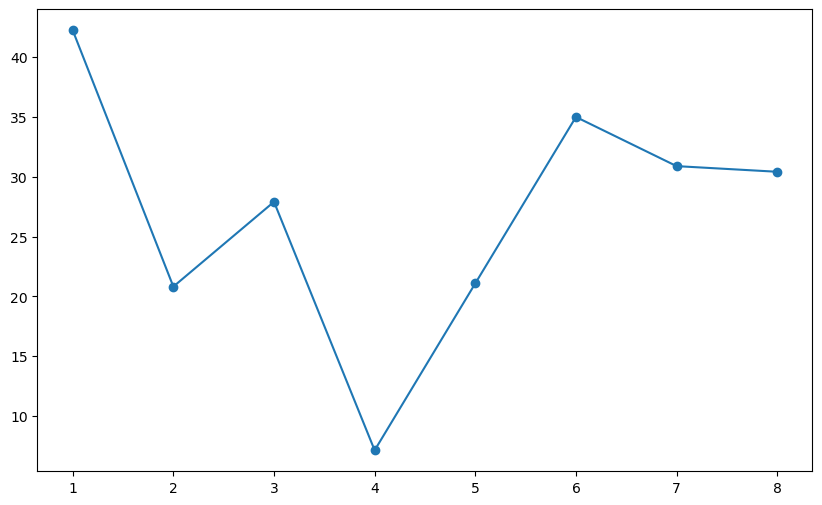

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df est votre DataFrame

# Définir le niveau de signification
alpha = 0.05

# Liste des numéros de sprint à comparer avec le sprint 1
sprint_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Créer une liste pour stocker les résultats
results = []

# Calculer les différences moyennes des scores entre le sprint 1 et chaque autre sprint pour chaque session
for session in range(1, 9):  # Boucle sur chaque session de 1 à 8
    session_results = {'Session': session}
    
    for sprint_number in sprint_numbers:
        sprint1_session_data = df[(df['Sprint'] == 1) & (df['Session'] == session)]['Score']
        other_sprint_session_data = df[(df['Sprint'] == sprint_number) & (df['Session'] == session)]['Score']
        
        # Effectuer le test t de Student
        t_statistic, p_value = stats.ttest_ind(sprint1_session_data, other_sprint_session_data)
        
        # Stocker les résultats avec un astérisque s'il est significatif
        if p_value < alpha:
            difference = sprint1_session_data.mean() - other_sprint_session_data.mean()
            session_results[f'Sprint {sprint_number}'] = f"{difference} (Significatif)"
            if difference > 0:
                session_results[f'Sprint {sprint_number}'] += '*'
        else:
            session_results[f'Sprint {sprint_number}'] = f"{sprint1_session_data.mean() - other_sprint_session_data.mean()} (Non significatif)"
    
    results.append(session_results)

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Afficher le tableau résumant les résultats avec des lignes en alternance gris et blanc
styled_results_df = results_df.style.set_properties(**{'background-color': 'lightgrey', 'color': 'black'}).bar(subset=['Session'], color='white')
display(styled_results_df)

# Tracer un graphique des différences moyennes entre le sprint 1 et les autres sprints pour chaque session
plt.figure(figsize=(10, 6))

for sprint_number in sprint_numbers:
    differences = results_df[f'Sprint {sprint_number}'].apply(lambda x: float(x.split()[0]))
    significatif = [1 if '*' in diff else 0 for diff in results_df[f'Sprint {sprint_number}']]
    plt.plot(range(1, 9), differences, marker='o', label=f'Sprint {sprint_number}')
    plt.scatter(range(1, 9), differences, c='red', s=30 * (1 + 5 * significatif))

plt.xlabel('Session')
plt.ylabel('Différence moyenne de score')
plt.title('Différences moyennes de score entre le sprint 1 et les autres sprints pour chaque session')
plt.legend()
plt.grid(True)
plt.show()


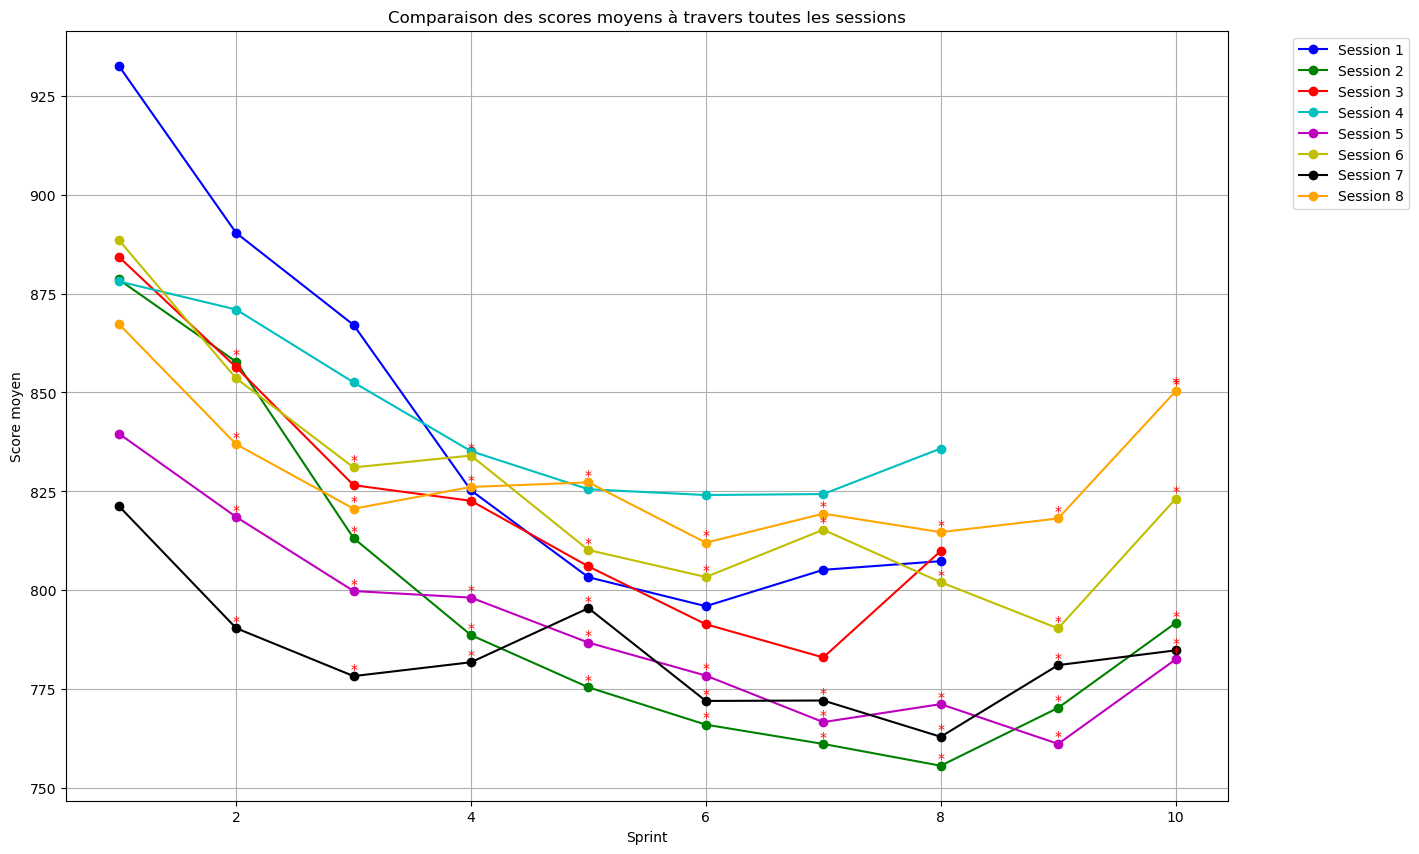

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que sprint_session_means contient les données que vous avez mentionnées dans le code précédent

# Définir le niveau de signification
alpha = 0.05
# Calculer la moyenne des scores pour chaque série dans chaque session
sprint_session_means = df.groupby(['Sprint', 'Session'])['Score'].mean().unstack()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']





# Liste pour stocker les résultats des tests t de Student
significant_sessions = []

# Comparer les scores moyens de chaque session du sprint 1 avec ceux des autres sprints
for session in sprint_session_means.columns:
    sprint1_scores = sprint_session_means[session][1]  # Scores du sprint 1 pour la session actuelle
    other_sprints_scores = sprint_session_means[session][2:]  # Scores des autres sprints pour la session actuelle
    
    # Effectuer le test t de Student
    t_statistic, p_value = stats.ttest_ind(sprint1_scores, other_sprints_scores)
    
    # Vérifier si la différence est significative
    if p_value < alpha:
        significant_sessions.append(session)

# Tracer le graphique avec les astérisques
plt.figure(figsize=(15, 10))
for i, session in enumerate(sprint_session_means.columns):
    plt.plot(sprint_session_means.index, sprint_session_means[session], marker='o', color=colors[i], label=f'Session {session}')
    if session in significant_sessions:
        significant_points = sprint_session_means[session][sprint_session_means[session].index != 1]  # Exclure le sprint 1
        for x, y in zip(significant_points.index, significant_points):
            plt.text(x, y, "*", ha='center', va='bottom', color='red')

plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Comparaison des scores moyens à travers toutes les sessions')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(x, y, "*", ha='center', va='bottom', color='red', fontsize=12)

plt.show()



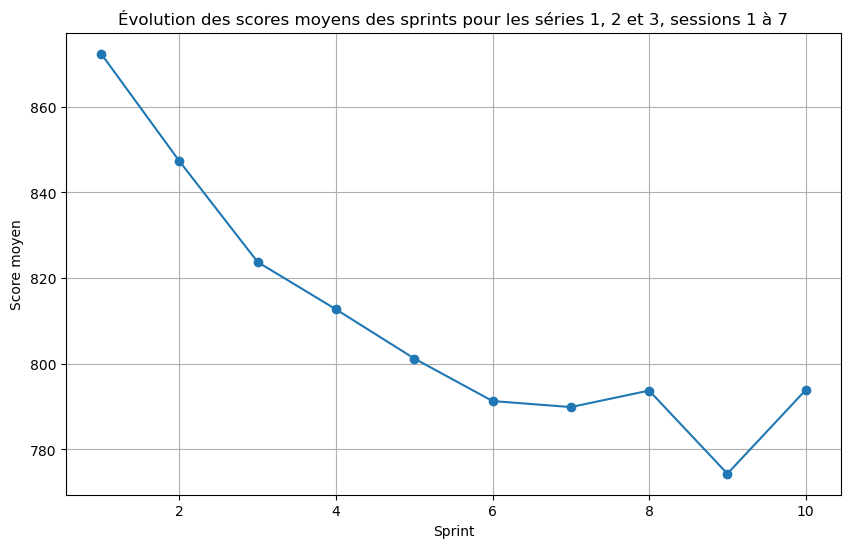

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df contient vos données

# Filtrer les données pour les séries 1, 2 et 3 et les sessions de 1 à 7
series_1_to_3_session_1_to_7 = df[(df['Série'].isin([1, 2, 3])) & (df['Session'].isin([1, 2, 3, 4, 5, 6, 7]))]

# Calculer les moyennes des scores pour chaque sprint
sprint_means = series_1_to_3_session_1_to_7.groupby('Sprint')['Score'].mean()

# Calculer les différences de moyennes entre le sprint 1 et les autres sprints
sprint1_mean = sprint_means[1]
other_sprints_means = sprint_means.drop(1)
diff_means = other_sprints_means - sprint1_mean

# Effectuer un test t de Student pour chaque sprint par rapport au sprint 1
significant_sprints = []
for sprint in diff_means.index:
    _, p_value = stats.ttest_ind(series_1_to_3_session_1_to_7[series_1_to_3_session_1_to_7['Sprint'] == 1]['Score'],
                                 series_1_to_3_session_1_to_7[series_1_to_3_session_1_to_7['Sprint'] == sprint]['Score'])
    if p_value < 0.05:
        significant_sprints.append(sprint)

# Tracer le graphique avec les astérisques
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
for sprint in significant_sprints:
    plt.text(sprint, sprint_means[sprint], "*", ha='center', va='bottom', color='red')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints pour les séries 1, 2 et 3, sessions 1 à 7')
plt.grid(True)
plt.show()


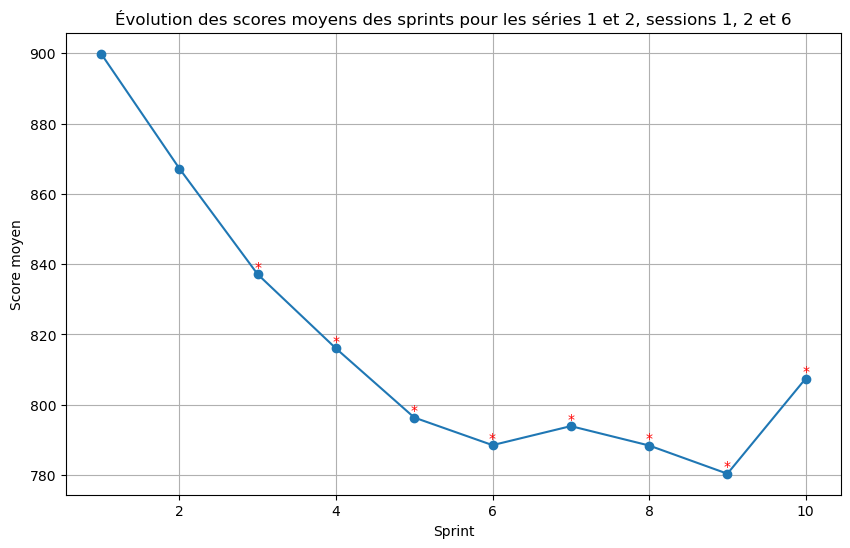

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df contient vos données

# Filtrer les données pour les séries 1 et 2 et les sessions 1, 2 et 6
series_1_and_2_session_1_2_6 = df[(df['Série'].isin([1, 2])) & (df['Session'].isin([1, 2, 6]))]

# Calculer les moyennes des scores pour chaque sprint
sprint_means = series_1_and_2_session_1_2_6.groupby('Sprint')['Score'].mean()

# Calculer les différences de moyennes entre le sprint 1 et les autres sprints
sprint1_mean = sprint_means[1]
other_sprints_means = sprint_means.drop(1)
diff_means = other_sprints_means - sprint1_mean

# Effectuer un test t de Student pour chaque sprint par rapport au sprint 1
significant_sprints = []
for sprint in diff_means.index:
    _, p_value = stats.ttest_ind(series_1_and_2_session_1_2_6[series_1_and_2_session_1_2_6['Sprint'] == 1]['Score'],
                                 series_1_and_2_session_1_2_6[series_1_and_2_session_1_2_6['Sprint'] == sprint]['Score'])
    if p_value < 0.05:
        significant_sprints.append(sprint)

# Tracer le graphique avec les astérisques
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
for sprint in significant_sprints:
    plt.text(sprint, sprint_means[sprint], "*", ha='center', va='bottom', color='red')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints pour les séries 1 et 2, sessions 1, 2 et 6')
plt.grid(True)
plt.show()


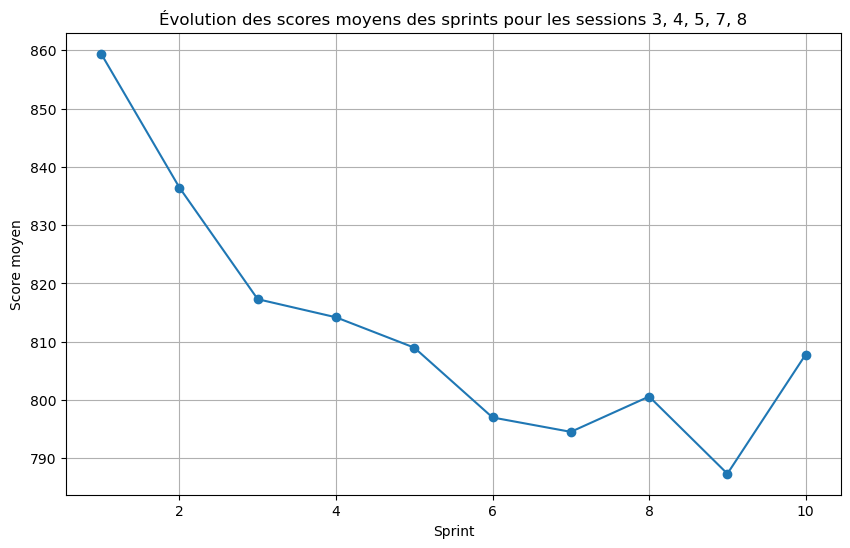

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Supposons que df contient vos données

# Filtrer les données pour les séries 1 et 2 et les sessions 1, 2 et 6
series_1_and_2_session_1_2_6 = df[(df['Série'].isin([1, 2,3])) & (df['Session'].isin([3, 4, 5, 7, 8]))]

# Calculer les moyennes des scores pour chaque sprint
sprint_means = series_1_and_2_session_1_2_6.groupby('Sprint')['Score'].mean()

# Calculer les différences de moyennes entre le sprint 1 et les autres sprints
sprint1_mean = sprint_means[1]
other_sprints_means = sprint_means.drop(1)
diff_means = other_sprints_means - sprint1_mean

# Effectuer un test t de Student pour chaque sprint par rapport au sprint 1
significant_sprints = []
for sprint in diff_means.index:
    _, p_value = stats.ttest_ind(series_1_and_2_session_1_2_6[series_1_and_2_session_1_2_6['Sprint'] == 1]['Score'],
                                 series_1_and_2_session_1_2_6[series_1_and_2_session_1_2_6['Sprint'] == sprint]['Score'])
    if p_value < 0.05:
        significant_sprints.append(sprint)

# Tracer le graphique avec les astérisques
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
for sprint in significant_sprints:
    plt.text(sprint, sprint_means[sprint], "*", ha='center', va='bottom', color='red')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints pour les sessions 3, 4, 5, 7, 8')
plt.grid(True)
plt.show()


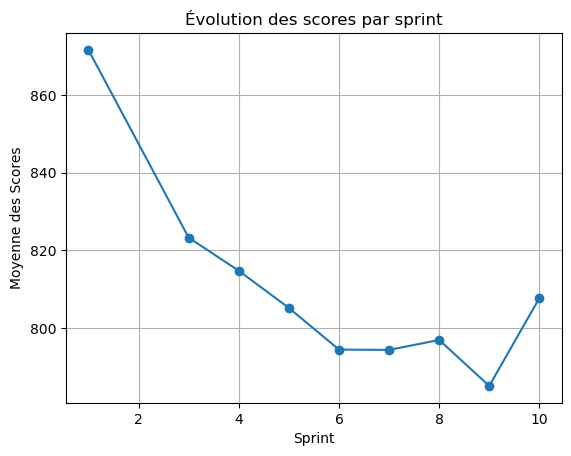

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path = "C:\Python\Dossier csv\RSA BIKE protocole BDL - data (1).csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

selected_sprints = [1, 3, 4, 5, 6, 7, 8, 9, 10]

filtered_df = df[df['Sprint'].isin(selected_sprints)]

# Groupez les données par session et calculez les moyennes des sprints sélectionnés
mean_scores = filtered_df.groupby('Sprint')['Score'].mean()

# Affichez les moyennes des scores pour chaque session
plt.plot(mean_scores.index, mean_scores.values, marker='o', linestyle='-')

# Ajouter des étiquettes et un titre
plt.xlabel('Sprint')
plt.ylabel('Moyenne des Scores')
plt.title('Évolution des scores par sprint')

# Afficher le graphique
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path = "C:\Python\Dossier csv\RSA BIKE protocole BDL - data (1).csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)

selected_sprints = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

filtered_df = df[df['Sprint'].isin(selected_sprints)]

# Groupez les données par session et calculez les moyennes des sprints sélectionnés
mean_scores = filtered_df.groupby('Sprint')['Score'].mean()

print(mean_scores)

Sprint
1     871.635220
2     845.735849
3     823.276730
4     814.735849
5     805.163522
6     794.427673
7     794.339623
8     796.905660
9     785.061224
10    807.683673
Name: Score, dtype: float64


In [20]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    2: 845.735849,
    3: 823.276730,
    4: 814.735849,
    5: 805.163522,
    6: 794.427673,
    7: 794.339623,
    8: 796.905660,
    9: 785.061224,
    10: 807.683673
}

# Comparaison de chaque paire de sprints
significant_comparisons = []
for sprint1, sprint2 in combinations(sprint_means.keys(), 2):
    scores_sprint1 = sprint_means[sprint1]
    scores_sprint2 = sprint_means[sprint2]
    if scores_sprint1 != scores_sprint2:  # Vérification si les moyennes ne sont pas exactement égales
        _, p_value = ttest_ind([scores_sprint1], [scores_sprint2], equal_var=False)  # Utilisation de equal_var=False pour ne pas supposer l'égalité des variances
        if p_value < 0.05:
            significant_comparisons.append((sprint1, sprint2))

# Affichage des comparaisons significatives
print("Comparaisons significatives (p-value < 0.05) :")
for sprint1, sprint2 in significant_comparisons:
    print(f"Sprint {sprint1} vs. Sprint {sprint2}")


Comparaisons significatives (p-value < 0.05) :


C:\Users\quent\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\quent\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [17]:
import pandas as pd
from itertools import combinations
from scipy.stats import mannwhitneyu

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    3: 823.276730,
    4: 814.735849,
    5: 805.163522,
    6: 794.427673,
    7: 794.339623,
    8: 796.905660,
    9: 785.061224,
    10: 807.683673
}

# Comparaison de chaque paire de sprints
significant_comparisons = []
for sprint1, sprint2 in combinations(sprint_means.keys(), 2):
    scores_sprint1 = sprint_means[sprint1]
    scores_sprint2 = sprint_means[sprint2]
    _, p_value = mannwhitneyu([scores_sprint1], [scores_sprint2], alternative='two-sided')
    if p_value < 0.05:
        significant_comparisons.append((sprint1, sprint2))

# Affichage des comparaisons significatives
print("Comparaisons significatives (p-value < 0.05) :")
for sprint1, sprint2 in significant_comparisons:
    print(f"Sprint {sprint1} vs. Sprint {sprint2}")


Comparaisons significatives (p-value < 0.05) :


In [21]:
import pandas as pd
from itertools import combinations
from scipy.stats import mannwhitneyu

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    2: 845.735849,
    3: 823.276730,
    4: 814.735849,
    5: 805.163522,
    6: 794.427673,
    7: 794.339623,
    8: 796.905660,
    9: 785.061224,
    10: 807.683673
}

# Comparaison de chaque paire de sprints
significant_comparisons = []
for sprint1, sprint2 in combinations(sprint_means.keys(), 2):
    scores_sprint1 = sprint_means[sprint1]
    scores_sprint2 = sprint_means[sprint2]
    _, p_value = mannwhitneyu([scores_sprint1], [scores_sprint2], alternative='two-sided')
    if p_value < 0.05:
        significant_comparisons.append((sprint1, sprint2))

# Affichage des comparaisons significatives
if significant_comparisons:
    print("Comparaisons significatives (p-value < 0.05) :")
    for sprint1, sprint2 in significant_comparisons:
        print(f"Sprint {sprint1} vs. Sprint {sprint2}")
else:
    print("Il n'y a pas de différence significative entre les sprints.")


Il n'y a pas de différence significative entre les sprints.


In [22]:
from scipy.stats import mannwhitneyu

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    2: 845.735849,
    7: 794.339623,
    8: 796.905660
}

# Calculer la médiane des scores pour chaque groupe de sprints
scores_sprints_1_2 = [sprint_means[1], sprint_means[2]]
scores_sprints_7_8 = [sprint_means[7], sprint_means[8]]

# Effectuer le test U de Mann-Whitney
_, p_value = mannwhitneyu(scores_sprints_1_2, scores_sprints_7_8, alternative='two-sided')

# Affichage du résultat
if p_value < 0.05:
    print("La différence entre les moyennes des sprints 1 et 2 est significativement différente de celle entre les sprints 7 et 8.")
else:
    print("Il n'y a pas de différence significative entre les moyennes des sprints 1 et 2 et celles des sprints 7 et 8.")


Il n'y a pas de différence significative entre les moyennes des sprints 1 et 2 et celles des sprints 7 et 8.


In [23]:
from scipy.stats import mannwhitneyu

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    2: 845.735849,
    9: 785.061224,
   10: 807.683673
}

# Calculer la médiane des scores pour chaque groupe de sprints
scores_sprints_1_2 = [sprint_means[1], sprint_means[2]]
scores_sprints_7_8 = [sprint_means[9], sprint_means[10]]

# Effectuer le test U de Mann-Whitney
_, p_value = mannwhitneyu(scores_sprints_1_2, scores_sprints_7_8, alternative='two-sided')

# Affichage du résultat
if p_value < 0.05:
    print("La différence entre les moyennes des sprints 1 et 2 est significativement différente de celle entre les sprints 9 et 10.")
else:
    print("Il n'y a pas de différence significative entre les moyennes des sprints 1 et 2 et celles des sprints 9 et 10.")


Il n'y a pas de différence significative entre les moyennes des sprints 1 et 2 et celles des sprints 9 et 10.


In [25]:
from scipy.stats import ttest_ind

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    2: 845.735849,
    7: 794.339623,
    8: 796.905660
}

# Calculer les moyennes des deux groupes
mean_sprints_1_2 = (sprint_means[1] + sprint_means[2]) / 2
mean_sprints_7_8 = (sprint_means[7] + sprint_means[8]) / 2

# Effectuer le test t de Student indépendant
_, p_value = ttest_ind([mean_sprints_1_2], [mean_sprints_7_8])

# Affichage du résultat
if p_value < 0.05:
    print("La différence entre la moyenne des sprints 1 et 2 est significativement différente de celle entre les sprints 7 et 8.")
else:
    print("Il n'y a pas de différence significative entre la moyenne des sprints 1 et 2 et celle des sprints 7 et 8.")


Il n'y a pas de différence significative entre la moyenne des sprints 1 et 2 et celle des sprints 7 et 8.


C:\Users\quent\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [26]:
from scipy.stats import ttest_ind

# Moyennes des scores pour chaque sprint
sprint_means = {
    1: 871.635220,
    2: 845.735849,
    7: 794.339623,
    8: 796.905660
}

# Calculer les moyennes des deux groupes
mean_sprints_1_2 = (sprint_means[1] + sprint_means[2]) / 2
mean_sprints_7_8 = (sprint_means[7] + sprint_means[8]) / 2

# Vérifier si les variances des groupes sont différentes de zéro
if sprint_means[1] != sprint_means[2] and sprint_means[7] != sprint_means[8]:
    # Effectuer le test t de Student indépendant
    _, p_value = ttest_ind([mean_sprints_1_2], [mean_sprints_7_8])
else:
    p_value = 1.0  # Si une variance est nulle, on assigne une p-value de 1.0 (aucune différence significative)

# Affichage du résultat
if p_value < 0.05:
    print("La différence entre la moyenne des sprints 1 et 2 est significativement différente de celle entre les sprints 7 et 8.")
else:
    print("Il n'y a pas de différence significative entre la moyenne des sprints 1 et 2 et celle des sprints 7 et 8.")


Il n'y a pas de différence significative entre la moyenne des sprints 1 et 2 et celle des sprints 7 et 8.


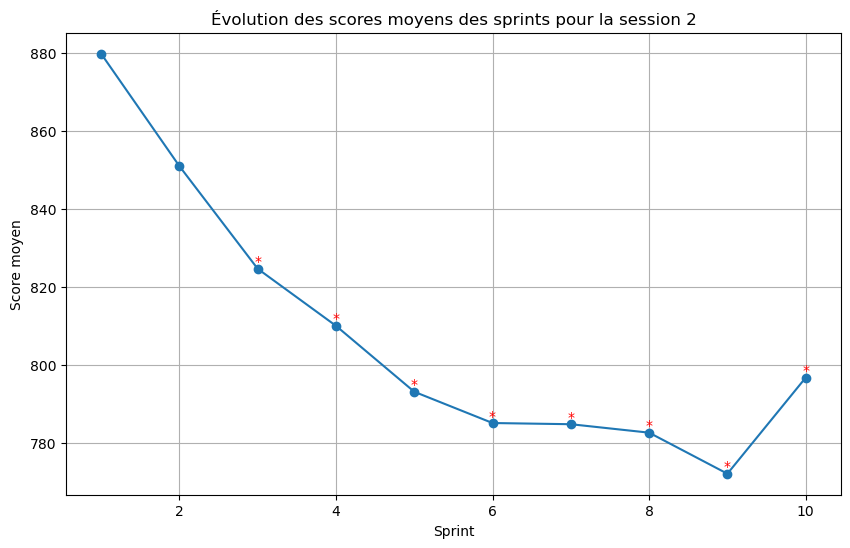

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



csv_file_path = "C:\Python\Dossier csv\RSA BIKE protocole BDL - data (1).csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file_path)


# Supposons que df contient vos données

# Filtrer les données pour les séries 1 et 2 et les sessions 1, 2 et 6
series_1_and_2_session_1_2_6 = df[(df['Série'].isin([1, 2, 3])) & (df['Session'].isin([1,2,5,6]))]

# Calculer les moyennes des scores pour chaque sprint
sprint_means = series_1_and_2_session_1_2_6.groupby('Sprint')['Score'].mean()

# Calculer les différences de moyennes entre le sprint 1 et les autres sprints
sprint1_mean = sprint_means[1]
other_sprints_means = sprint_means.drop(1)
diff_means = other_sprints_means - sprint1_mean

# Effectuer un test t de Student pour chaque sprint par rapport au sprint 1
significant_sprints = []
for sprint in diff_means.index:
    _, p_value = stats.ttest_ind(series_1_and_2_session_1_2_6[series_1_and_2_session_1_2_6['Sprint'] == 1]['Score'],
                                 series_1_and_2_session_1_2_6[series_1_and_2_session_1_2_6['Sprint'] == sprint]['Score'])
    if p_value < 0.05:
        significant_sprints.append(sprint)

# Tracer le graphique avec les astérisques
plt.figure(figsize=(10, 6))
plt.plot(sprint_means.index, sprint_means.values, marker='o')
for sprint in significant_sprints:
    plt.text(sprint, sprint_means[sprint], "*", ha='center', va='bottom', color='red')
plt.xlabel('Sprint')
plt.ylabel('Score moyen')
plt.title('Évolution des scores moyens des sprints pour la session 2')
plt.grid(True)
plt.show()
